1->Problem statement:-

To analyze the dataset containing the information on cervical cancer risk factors, and to develop a predictive model to:-
1. Predict the likelihood of cervical cancer based on patients characteristics and risk factors.
2. Identify the significant risk factors associated with the cervical cancer and provide insights for early detection and prevention strategies.

In [61]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

In [35]:
df = pd.read_csv('Data/risk_factors_cervical_cancer.csv',na_values='<NA>')


2-> Detailed information about the dataset

The columns in the dataset are as follows:

1. Age: Age of the patient.
2. Number of sexual partners: Number of sexual partners reported by the patient.
3. First sexual intercourse (age): Age at which the patient had their first sexual intercourse.
4. Num of pregnancies: Number of pregnancies reported by the patient.
5. Smokes: Whether the patient smokes (binary: Yes/No).
6. Smokes (years): Number of years the patient has been smoking (if applicable).
7. Smokes (packs/year): Number of packs of cigarettes the patient smokes per year (if applicable).
8. Hormonal Contraceptives: Whether the patient uses hormonal contraceptives (binary: Yes/No).
9. Hormonal Contraceptives (years): Number of years the patient has been using hormonal contraceptives (if applicable).
10. IUD: Whether the patient uses intrauterine device (IUD) for contraception (binary: Yes/No).
11. IUD (years): Number of years the patient has been using IUD (if applicable).
12. STDs: Whether the patient has any sexually transmitted diseases (STDs) (binary: Yes/No).
13. STDs (number): Number of STDs reported by the patient.
14. STDs:condylomatosis: Whether the patient has condylomatosis (binary: Yes/No).
15. STDs:cervical condylomatosis: Whether the patient has cervical condylomatosis (binary: Yes/No).
16. STDs:vaginal condylomatosis: Whether the patient has vaginal condylomatosis (binary: Yes/No).
17. STDs:vulvo-perineal condylomatosis: Whether the patient has vulvo-perineal condylomatosis (binary: Yes/No).
18. STDs:syphilis: Whether the patient has syphilis (binary: Yes/No).
19. STDs:pelvic inflammatory disease: Whether the patient has pelvic inflammatory disease (binary: Yes/No).
20. STDs:genital herpes: Whether the patient has genital herpes (binary: Yes/No).
21. STDs:molluscum contagiosum: Whether the patient has molluscum contagiosum (binary: Yes/No).
22. STDs:AIDS: Whether the patient has AIDS (binary: Yes/No).
23. STDs:HIV: Whether the patient has HIV (binary: Yes/No).
24. STDs:Hepatitis B: Whether the patient has Hepatitis B (binary: Yes/No).
25. STDs:HPV: Whether the patient has HPV (binary: Yes/No).
26. STDs: Number of diagnosis: Number of STD diagnoses reported by the patient.
27. STDs: Time since first diagnosis: Time since the first STD diagnosis (in years).
28. STDs: Time since last diagnosis: Time since the last STD diagnosis (in years).
29. Dx:Cancer: Whether the patient has been diagnosed with cancer (binary: Yes/No).
30. Dx:CIN: Whether the patient has been diagnosed with cervical intraepithelial neoplasia (CIN) (binary: Yes/No).
31. Dx:HPV: Whether the patient has been diagnosed with human papillomavirus (HPV) infection (binary: Yes/No).
32. Dx: Whether the patient has been diagnosed with any condition (binary: Yes/No).
33. Hinselmann: Target variable indicating the Hinselmann test result (binary: Positive/Negative).
34. Schiller: Target variable indicating the Schiller test result (binary: Positive/Negative).
35. Cytology: Target variable indicating the Cytology test result (binary: Positive/Negative).
36. Biopsy: Target variable indicating the Biopsy test result (binary: Positive/Negative).


In [46]:
df.head(15)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


3->Data Checks to perform:-

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

In [45]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


#Lets handle these missing values

In [49]:
import numpy as np

# Replace '<?>' with NaN in each column
df['Number of sexual partners'] = df['Number of sexual partners'].replace('?', np.nan)
df['First sexual intercourse'] = df['First sexual intercourse'].replace('?', np.nan)
df['Num of pregnancies'] = df['Num of pregnancies'].replace('?', np.nan)
df['Smokes'] = df['Smokes'].replace('?', np.nan)
df['Smokes (years)'] = df['Smokes (years)'].replace('?', np.nan)
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].replace('?', np.nan)
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].replace('?', np.nan)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].replace('?', np.nan)
df['IUD'] = df['IUD'].replace('?', np.nan)
df['IUD (years)'] = df['IUD (years)'].replace('?', np.nan)
df['STDs'] = df['STDs'].replace('?', np.nan)
df['STDs (number)'] = df['STDs (number)'].replace('?', np.nan)
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].replace('?', np.nan)
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].replace('?', np.nan)
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].replace('?', np.nan)
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].replace('?', np.nan)
df['STDs:syphilis'] = df['STDs:syphilis'].replace('?', np.nan)
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].replace('?', np.nan)
df['STDs:genital herpes'] = df['STDs:genital herpes'].replace('?', np.nan)
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].replace('?', np.nan)
df['STDs:AIDS'] = df['STDs:AIDS'].replace('?', np.nan)
df['STDs:HIV'] = df['STDs:HIV'].replace('?', np.nan)
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].replace('?', np.nan)
df['STDs:HPV'] = df['STDs:HPV'].replace('?', np.nan)
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].replace('?', np.nan)
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].replace('?', np.nan)

# Display the modified DataFrame
print(df)


     Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                      NaN   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0          

In [38]:
#See for the unique values of some column
for column in df.columns:
    print(f"Unique values in {column} column: {df[column].unique()}")



Unique values in Age column: [18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]
Unique values in Number of sexual partners column: ['4.0' '1.0' '5.0' '3.0' '2.0' '6.0' '?' '7.0' '15.0' '8.0' '10.0' '28.0'
 '9.0']
Unique values in First sexual intercourse column: ['15.0' '14.0' '?' '16.0' '21.0' '23.0' '17.0' '26.0' '20.0' '25.0' '18.0'
 '27.0' '19.0' '24.0' '32.0' '13.0' '29.0' '11.0' '12.0' '22.0' '28.0'
 '10.0']
Unique values in Num of pregnancies column: ['1.0' '4.0' '2.0' '6.0' '3.0' '5.0' '?' '8.0' '7.0' '0.0' '11.0' '10.0']
Unique values in Smokes column: ['0.0' '1.0' '?']
Unique values in Smokes (years) column: ['0.0' '37.0' '34.0' '1.266972909' '3.0' '12.0' '?' '18.0' '7.0' '19.0'
 '21.0' '15.0' '13.0' '16.0' '8.0' '4.0' '10.0' '22.0' '14.0' '0.5' '11.0'
 '9.0' '2.0' '5.0' '6.0' '1.0' '32.0' '24.0' '28.0' '20.0' '0.16']
Unique values in Smokes (packs/year) column: ['0.0' '37.0' '3.4' '2.8' '0.04

In [52]:
#See for the unique values of some column
for column in df.columns:
    print(f"Unique values in {column} column: {df[column].unique()}")



Unique values in Age column: [18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]
Unique values in Number of sexual partners column: ['4.0' '1.0' '5.0' '3.0' '2.0' '6.0' nan '7.0' '15.0' '8.0' '10.0' '28.0'
 '9.0']
Unique values in First sexual intercourse column: ['15.0' '14.0' nan '16.0' '21.0' '23.0' '17.0' '26.0' '20.0' '25.0' '18.0'
 '27.0' '19.0' '24.0' '32.0' '13.0' '29.0' '11.0' '12.0' '22.0' '28.0'
 '10.0']
Unique values in Num of pregnancies column: ['1.0' '4.0' '2.0' '6.0' '3.0' '5.0' nan '8.0' '7.0' '0.0' '11.0' '10.0']
Unique values in Smokes column: ['0.0' '1.0' nan]
Unique values in Smokes (years) column: ['0.0' '37.0' '34.0' '1.266972909' '3.0' '12.0' nan '18.0' '7.0' '19.0'
 '21.0' '15.0' '13.0' '16.0' '8.0' '4.0' '10.0' '22.0' '14.0' '0.5' '11.0'
 '9.0' '2.0' '5.0' '6.0' '1.0' '32.0' '24.0' '28.0' '20.0' '0.16']
Unique values in Smokes (packs/year) column: ['0.0' '37.0' '3.4' '2.8' '0.04

In [55]:
# Replace '?' with NaN in each column
df.replace('?', np.nan, inplace=True)

# Convert columns to numeric data types
numeric_columns = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes',
                   'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 
                   'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)',
                   'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
                   'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                   'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
                   'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']

df[numeric_columns] = df[numeric_columns].astype(float)

# Impute missing values using median
df.fillna(df.median(), inplace=True)

# Display the modified DataFrame
df.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,4.0,3.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0


In [6]:
#Check for duplicate values
duplicate_columns =[]
for column in df.columns:
    if df[column].duplicated().any():
        duplicate_columns.append(column)

In [7]:
print("Columns with duplicate values:")
for column in duplicate_columns:
    print("-", column)

Columns with duplicate values:
- Age
- Number of sexual partners
- First sexual intercourse
- Num of pregnancies
- Smokes
- Smokes (years)
- Smokes (packs/year)
- Hormonal Contraceptives
- Hormonal Contraceptives (years)
- IUD
- IUD (years)
- STDs
- STDs (number)
- STDs:condylomatosis
- STDs:cervical condylomatosis
- STDs:vaginal condylomatosis
- STDs:vulvo-perineal condylomatosis
- STDs:syphilis
- STDs:pelvic inflammatory disease
- STDs:genital herpes
- STDs:molluscum contagiosum
- STDs:AIDS
- STDs:HIV
- STDs:Hepatitis B
- STDs:HPV
- STDs: Number of diagnosis
- STDs: Time since first diagnosis
- STDs: Time since last diagnosis
- Dx:Cancer
- Dx:CIN
- Dx:HPV
- Dx
- Hinselmann
- Schiller
- Citology
- Biopsy


We can clearly see a lot of columns having duplicate values

In [8]:
#Checking the number od unique values of each column
df.nunique()

Age                                   44
Number of sexual partners             13
First sexual intercourse              22
Num of pregnancies                    12
Smokes                                 3
Smokes (years)                        31
Smokes (packs/year)                   63
Hormonal Contraceptives                3
Hormonal Contraceptives (years)       41
IUD                                    3
IUD (years)                           27
STDs                                   3
STDs (number)                          6
STDs:condylomatosis                    3
STDs:cervical condylomatosis           2
STDs:vaginal condylomatosis            3
STDs:vulvo-perineal condylomatosis     3
STDs:syphilis                          3
STDs:pelvic inflammatory disease       3
STDs:genital herpes                    3
STDs:molluscum contagiosum             3
STDs:AIDS                              2
STDs:HIV                               3
STDs:Hepatitis B                       3
STDs:HPV        

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

The dataset consists of 36 columns



In [10]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations:
1. Age - Average age(mean) of the people is approximately 26.820513, with a standard deviation of 8.5 yeard. 
The age ranges between 13 years(minimum) to 84 years(maximum)
2. STD Diagnosis:- On average the patients have been diagnosed with STD's approx 0.087 times, the maximum stands as 3, while the majority of patients have no reported STD diagnosis

In [11]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [12]:
df.shape


(858, 36)

In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [14]:
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))

print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['Age', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']

We have 26 categorical features : ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']


# Data Visualization

C:\Users\ossum\AppData\Local\Temp\ipykernel_10452\1009307016.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


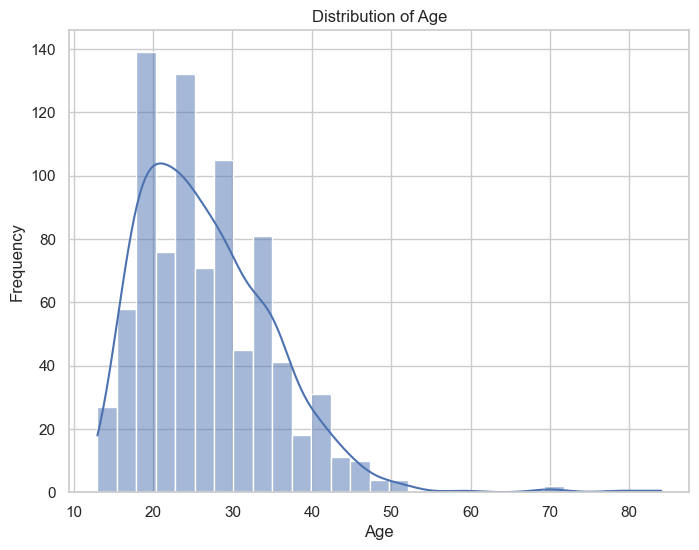

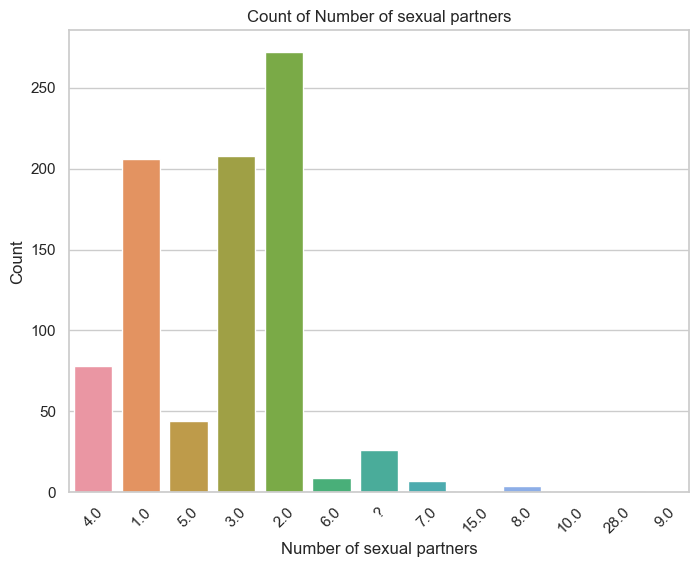

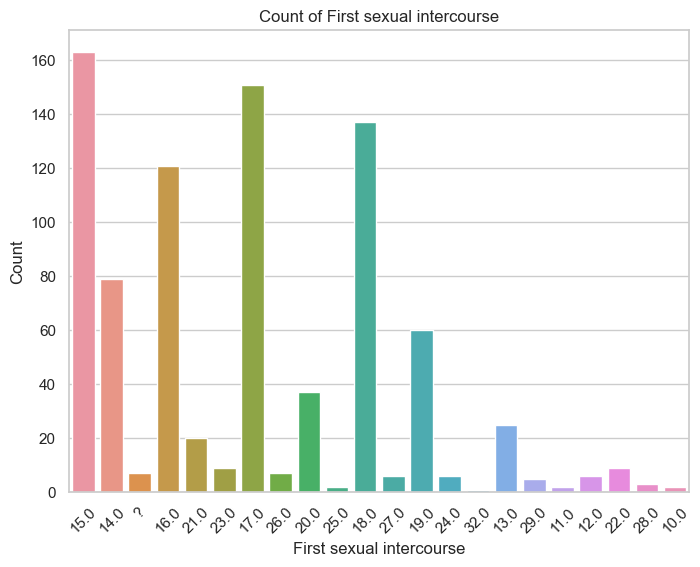

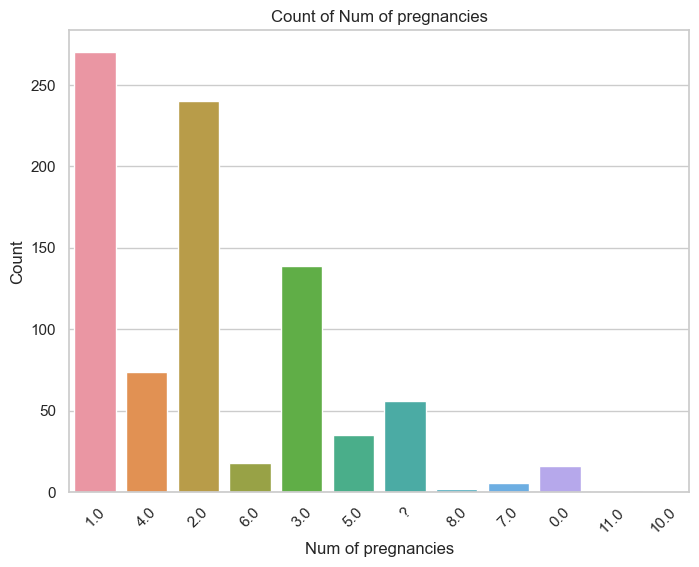

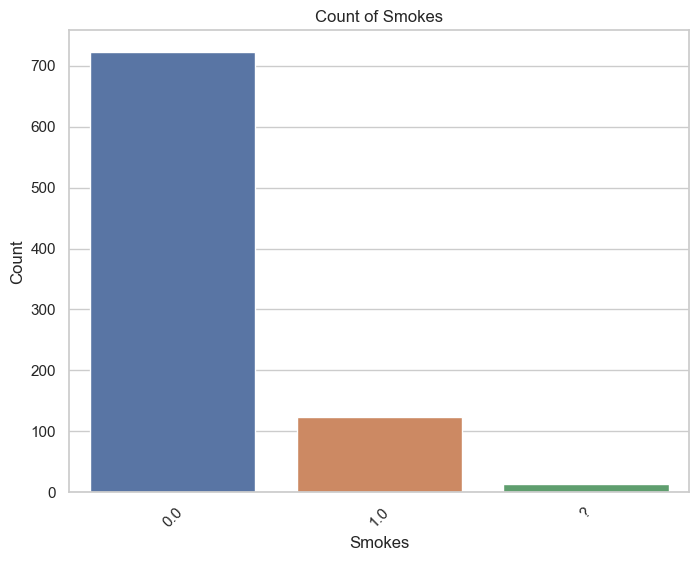

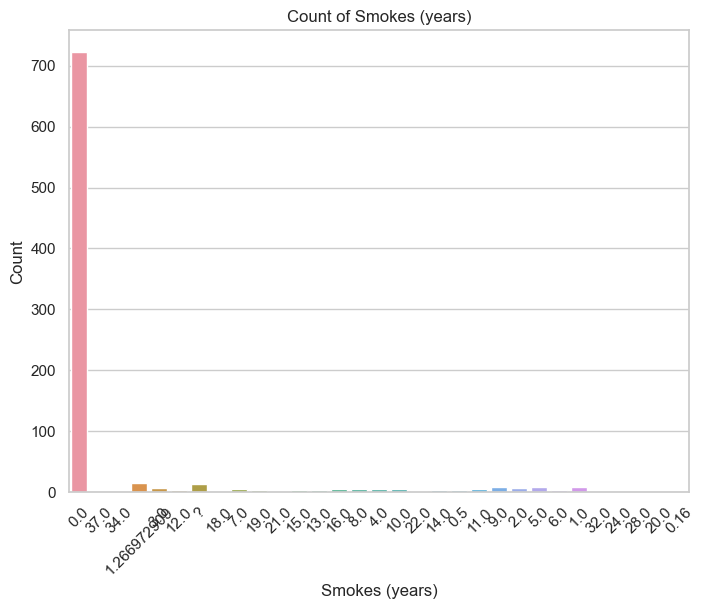

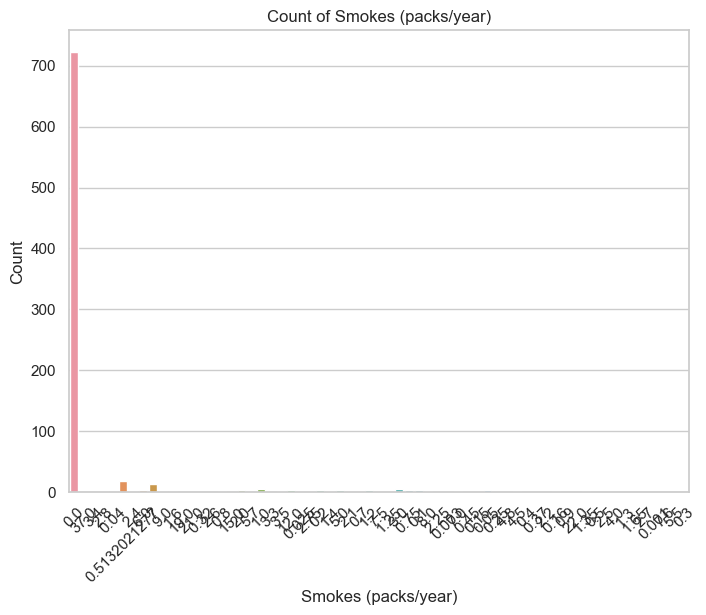

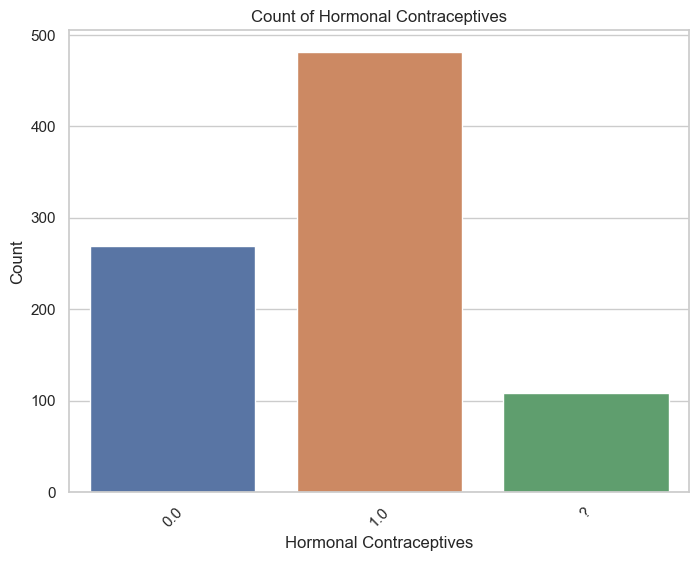

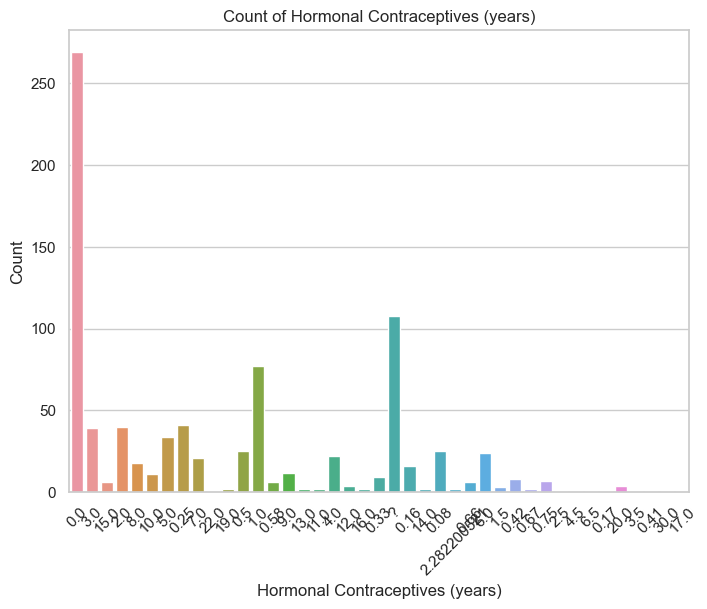

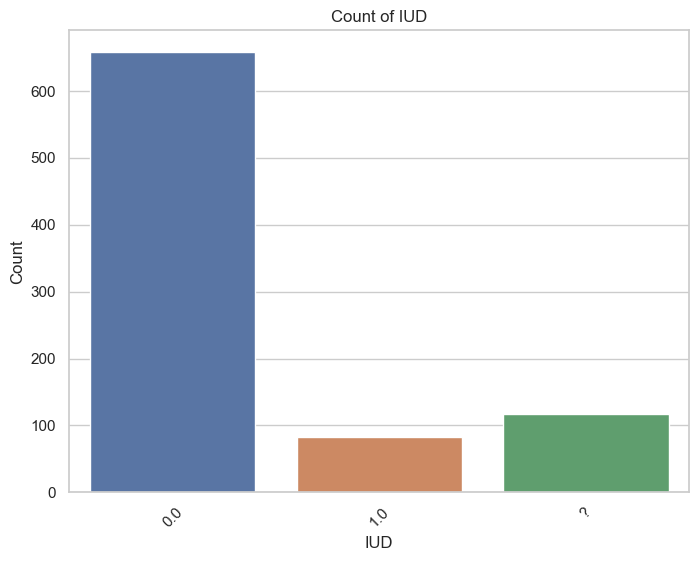

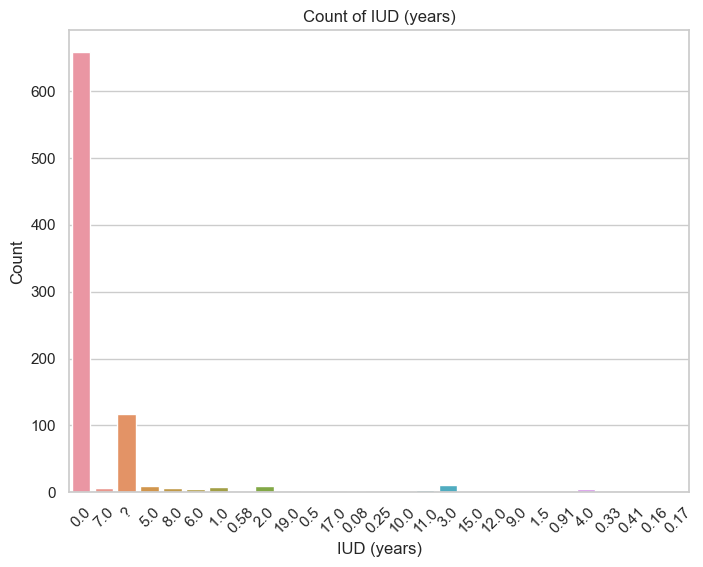

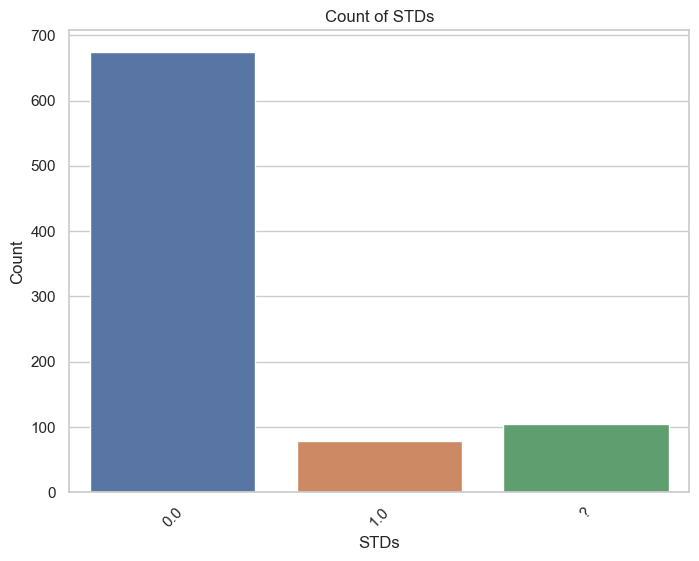

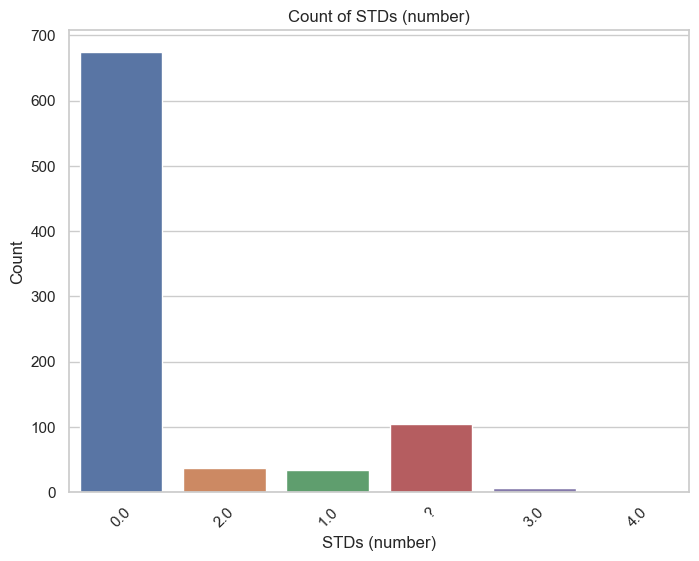

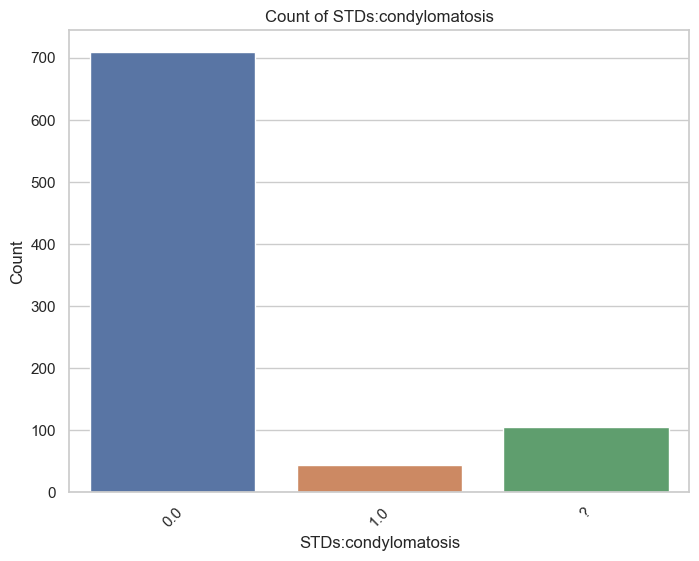

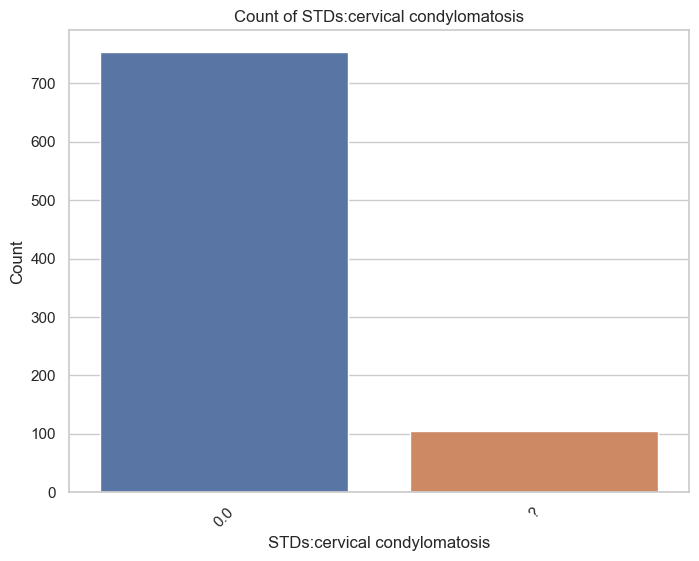

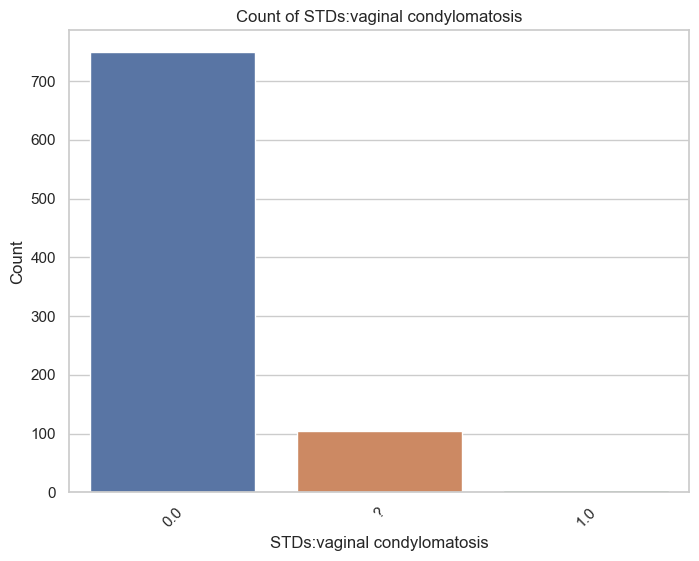

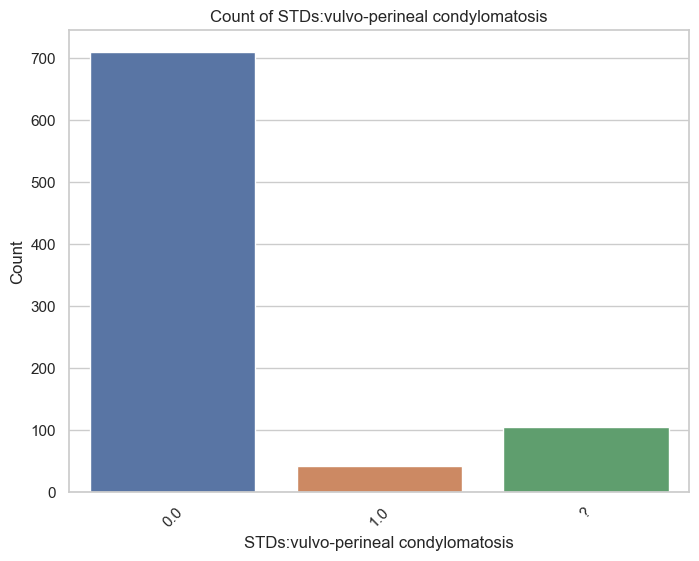

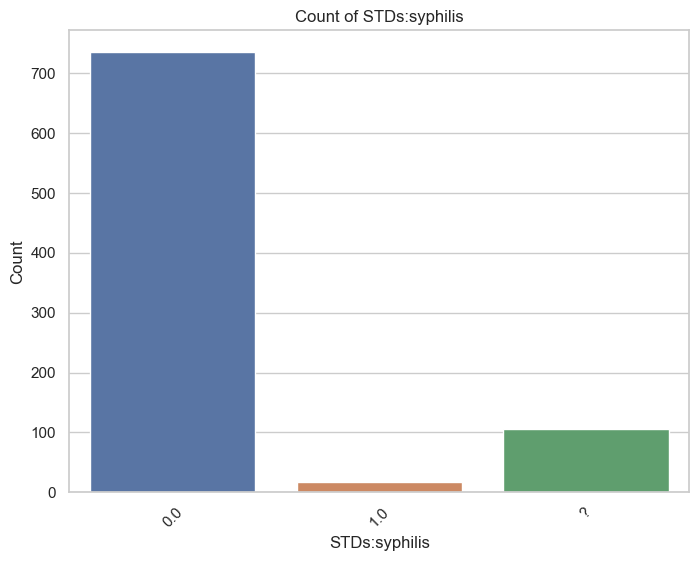

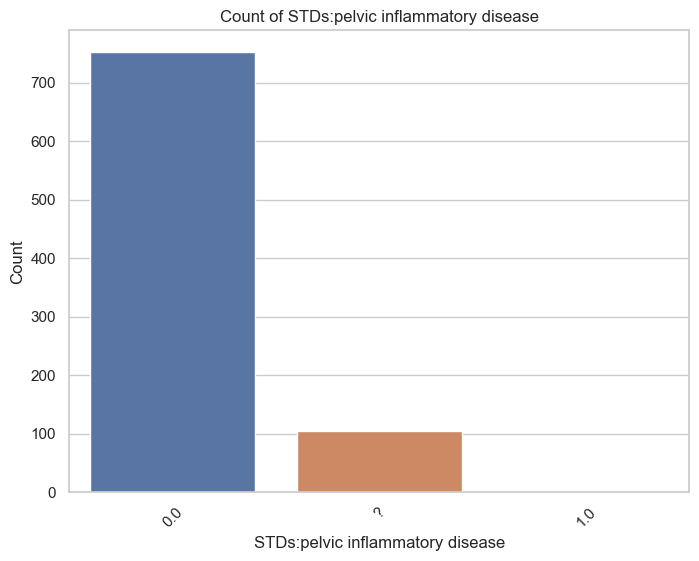

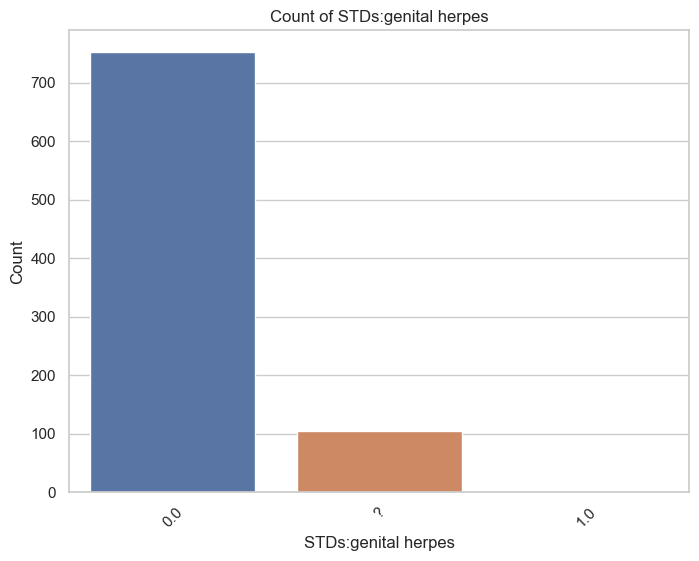

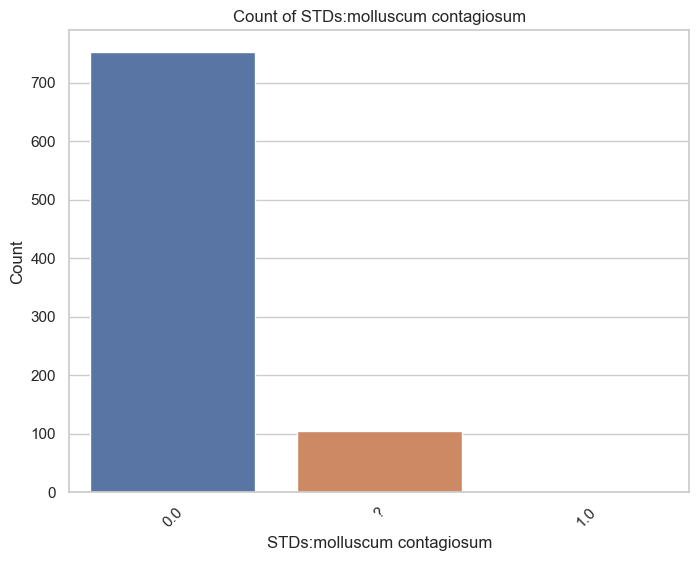

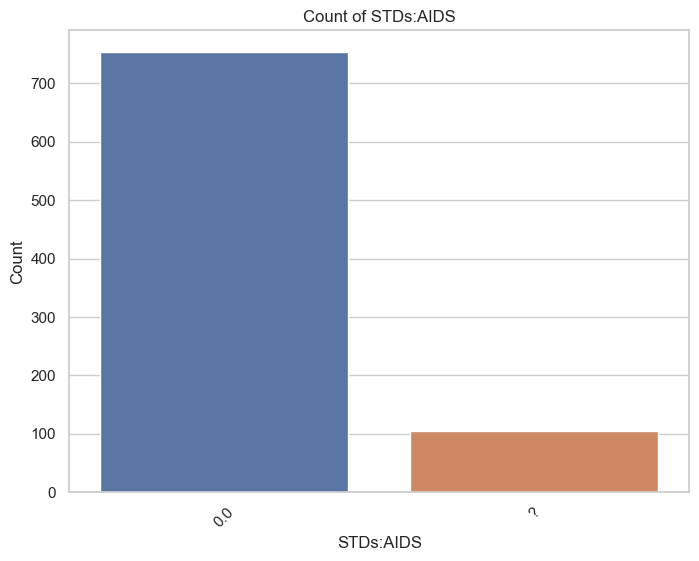

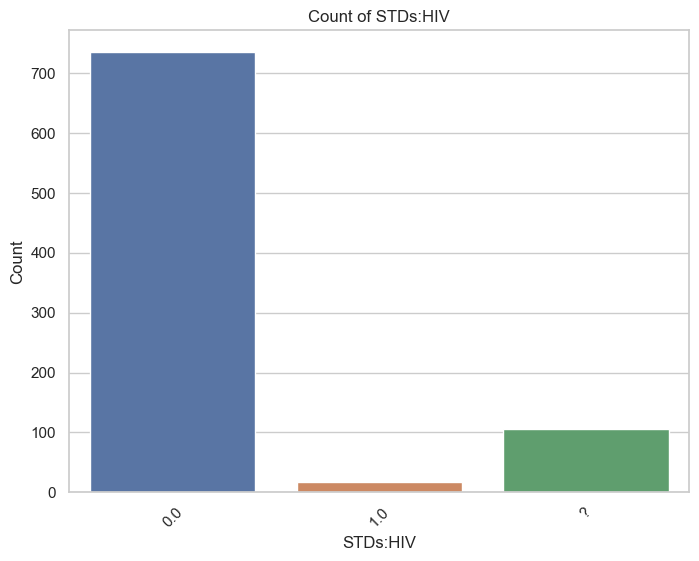

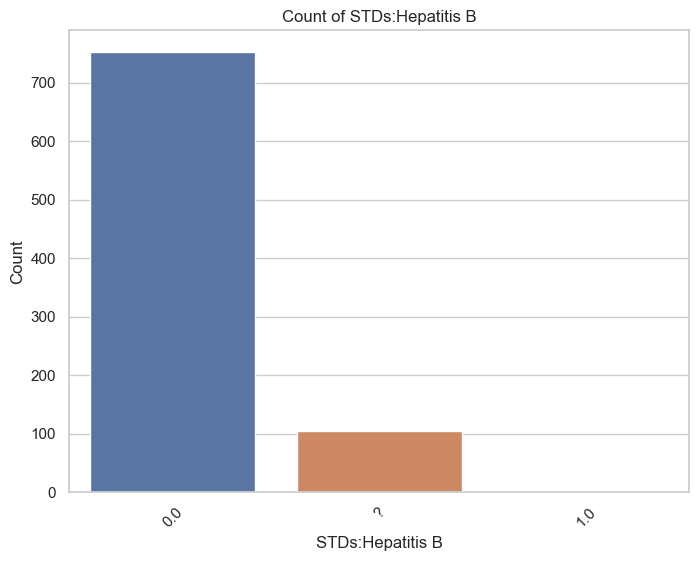

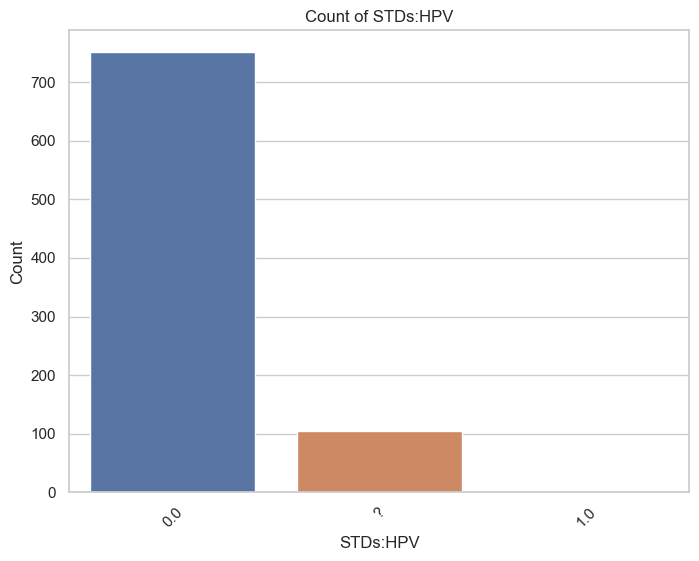

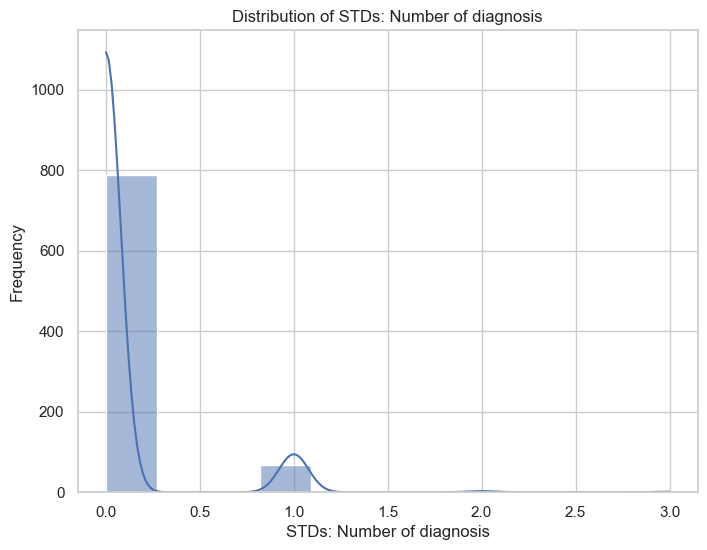

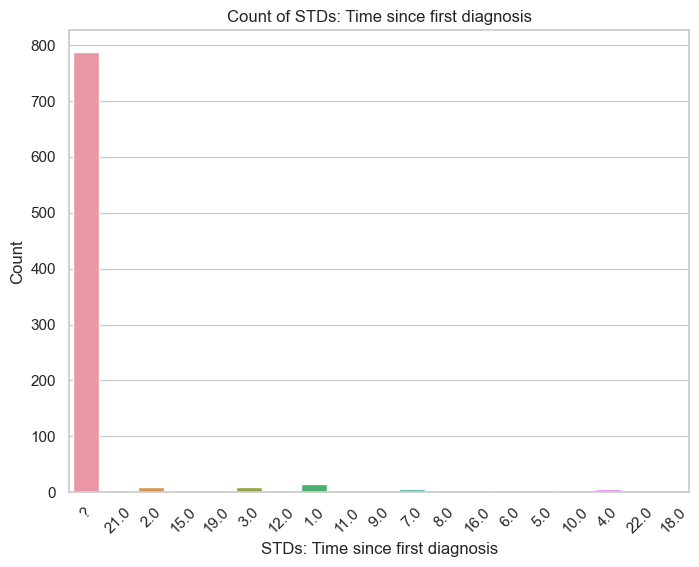

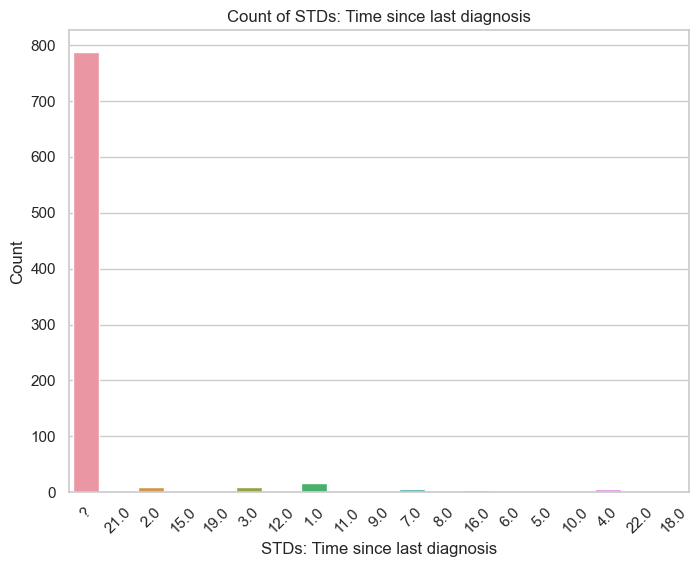

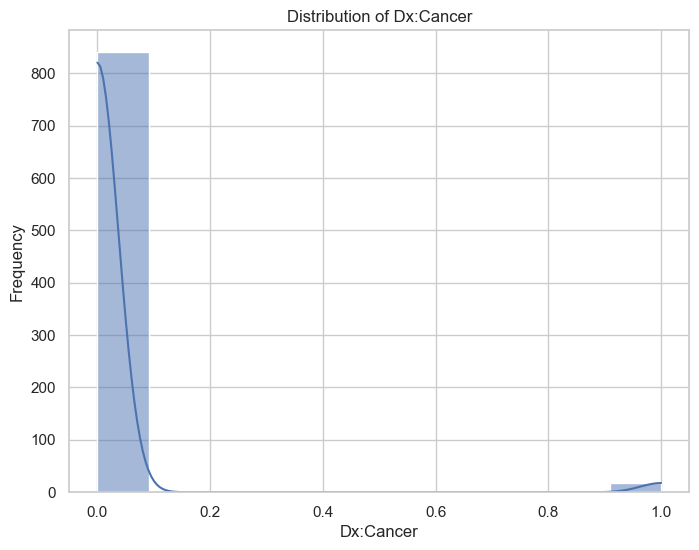

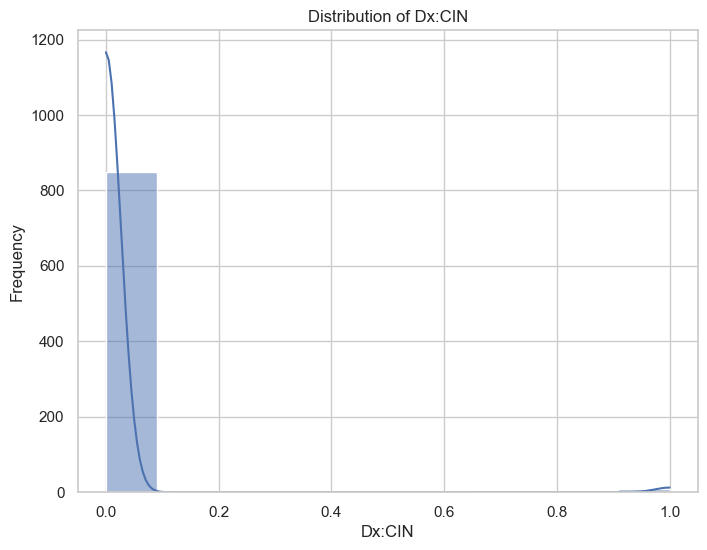

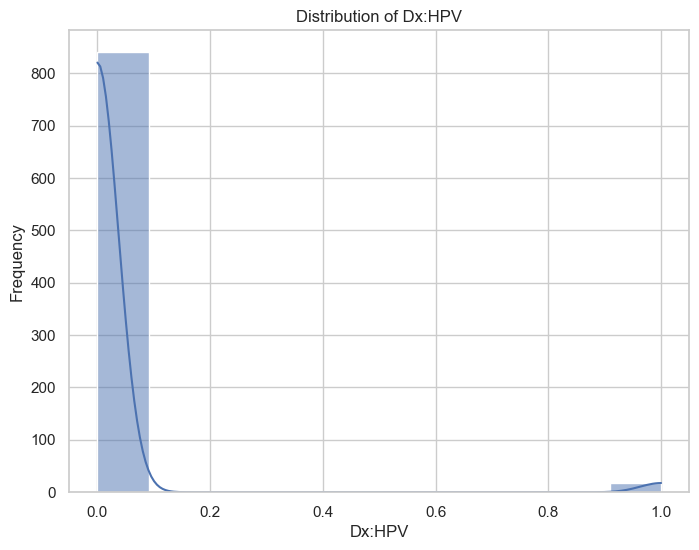

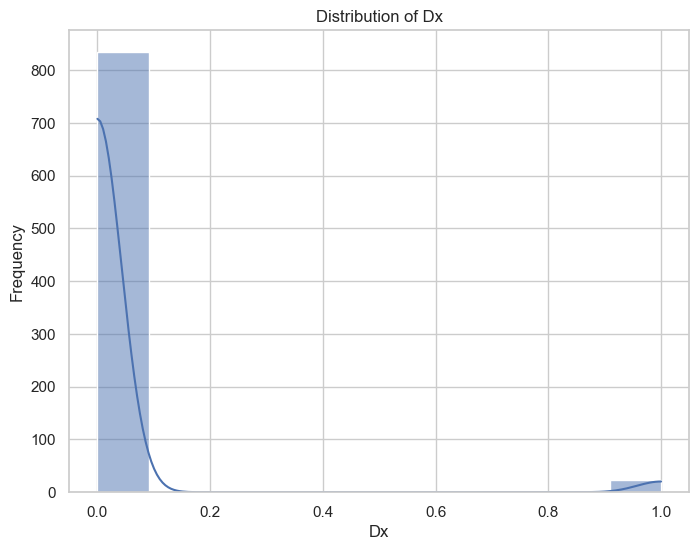

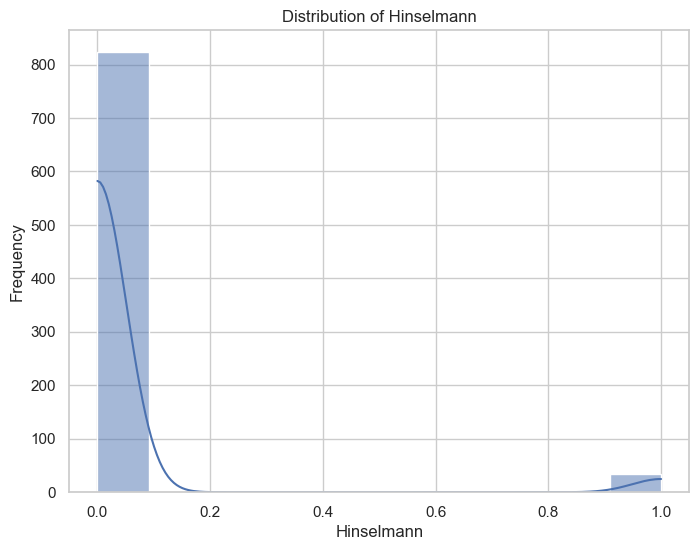

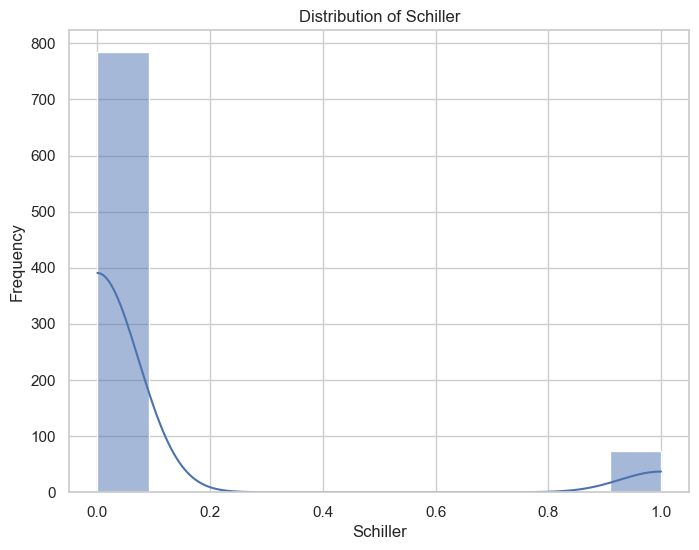

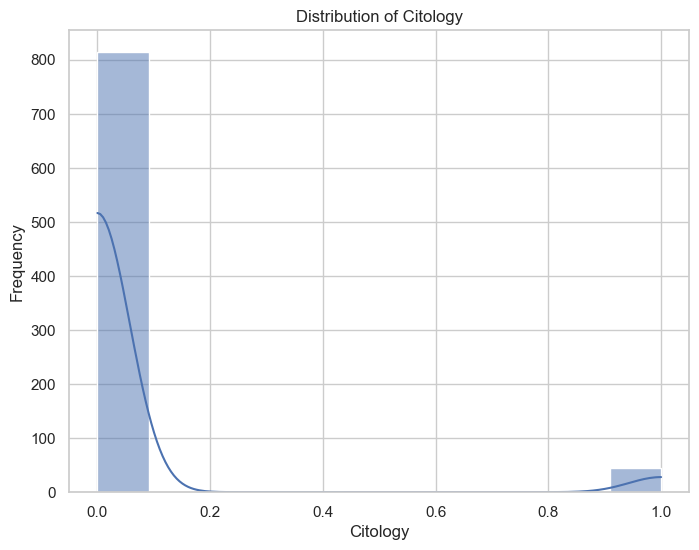

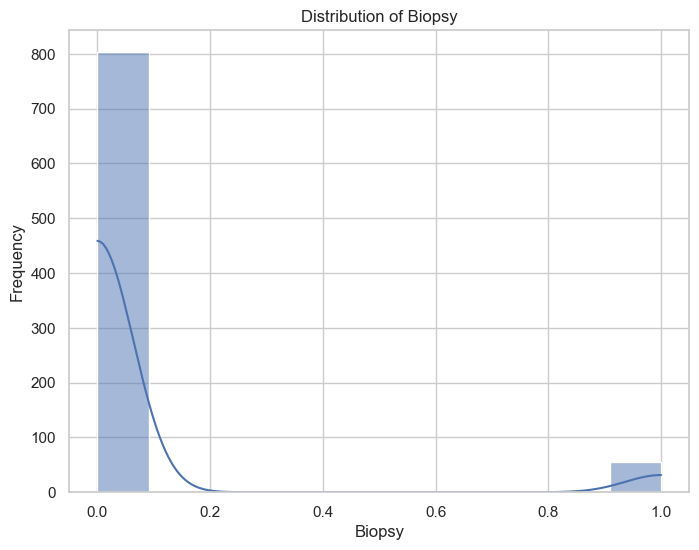

In [15]:
sns.set(style="whitegrid")

# Iterate through each column in the DataFrame
for col in df.columns:
    plt.figure(figsize=(8, 6))
    
    # Check if the column is numerical
    if df[col].dtype in ['int64', 'float64']:
        # Plot histogram for numerical columns
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        
    else:
        # Plot countplot for categorical columns
        sns.countplot(data=df, x=col)
        plt.title(f"Count of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)

C:\Users\ossum\AppData\Local\Temp\ipykernel_10452\3046952290.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,6))


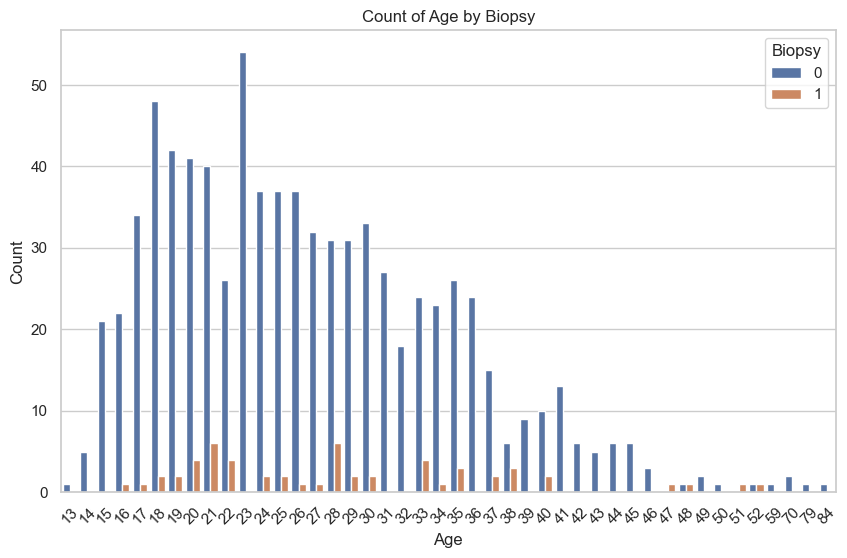

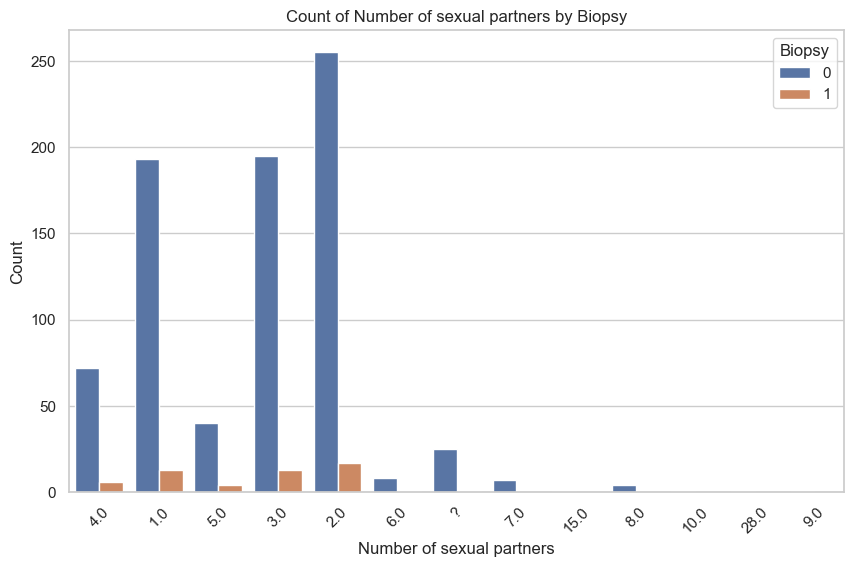

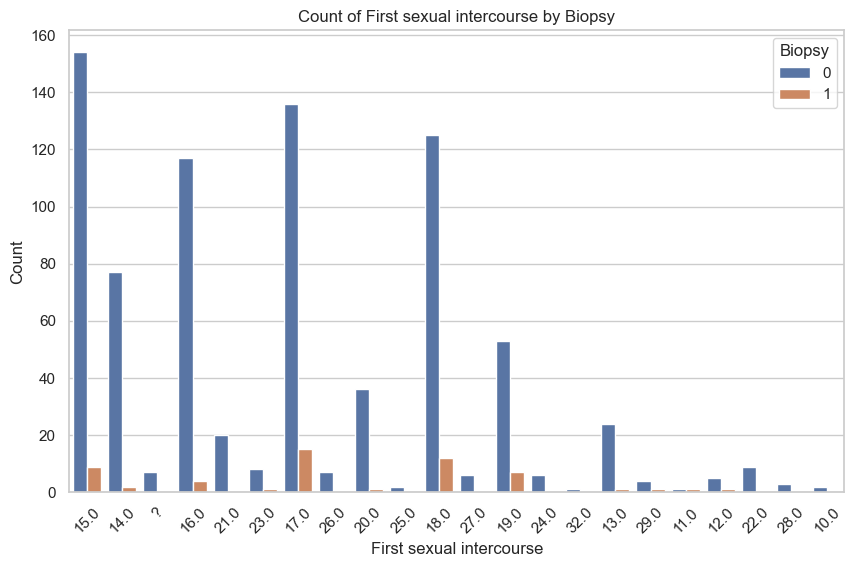

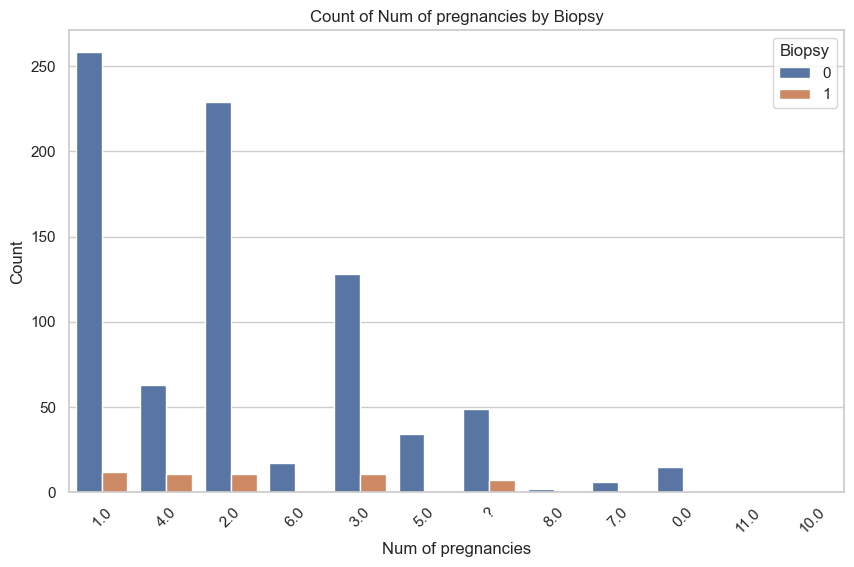

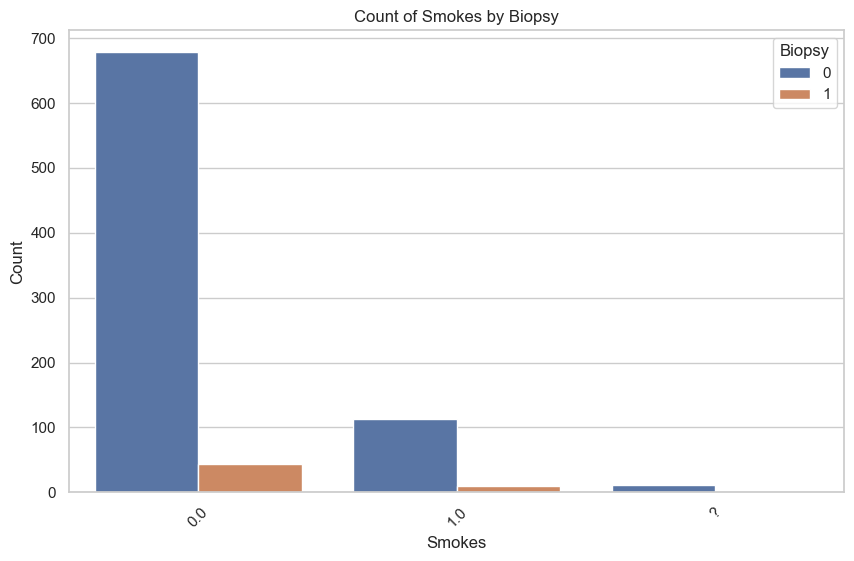

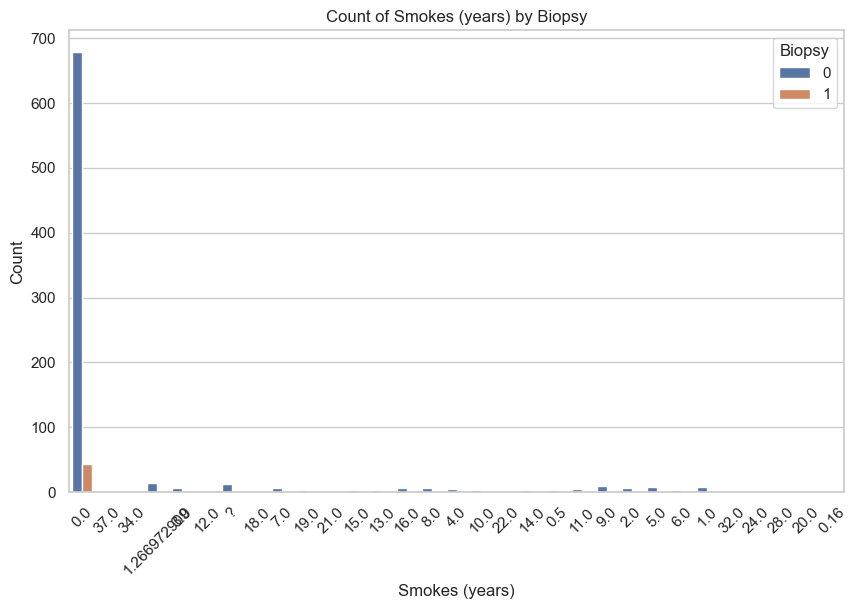

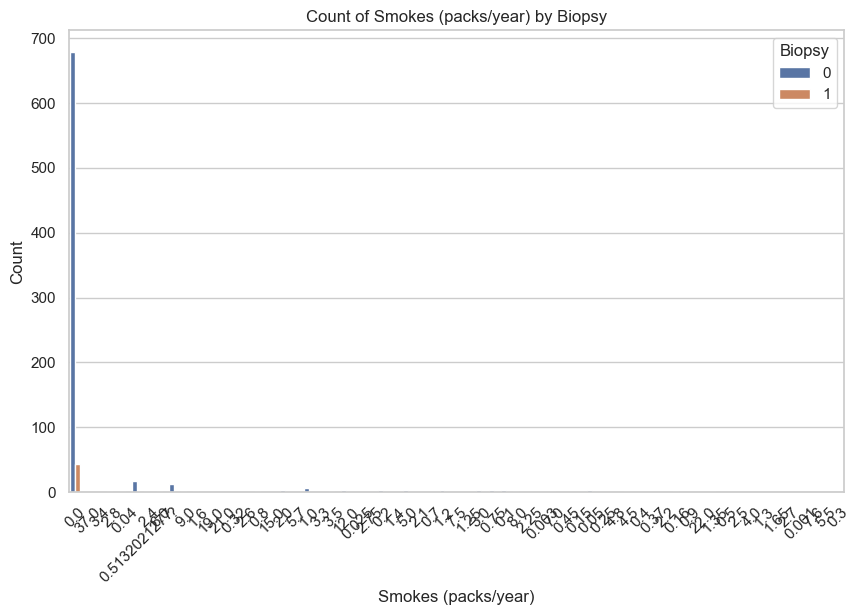

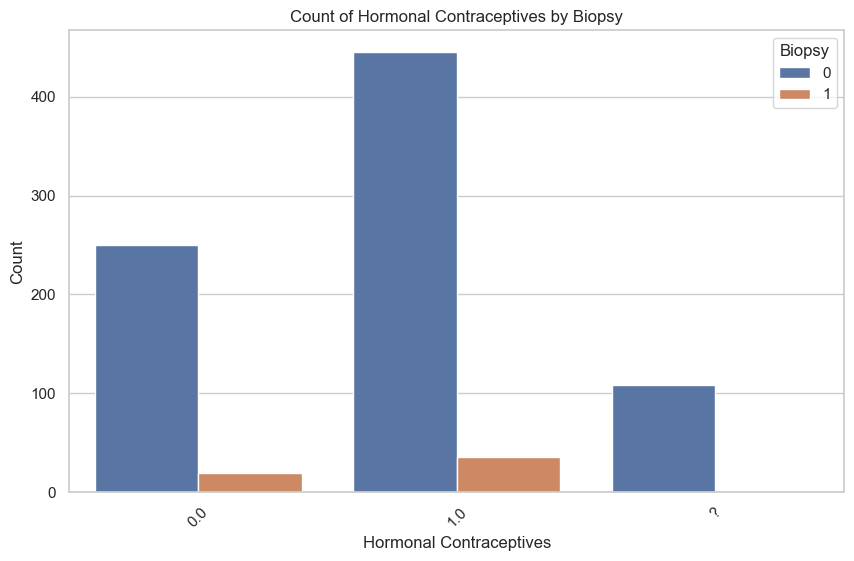

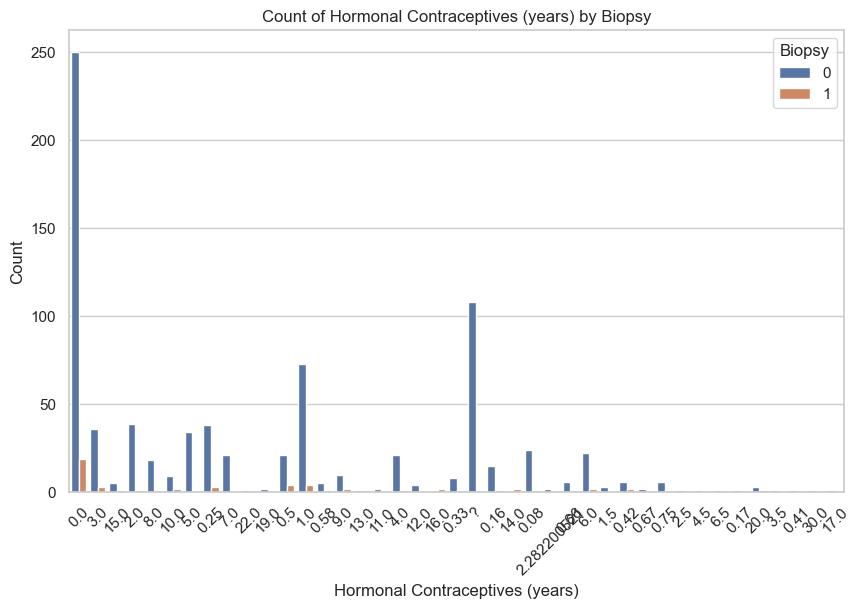

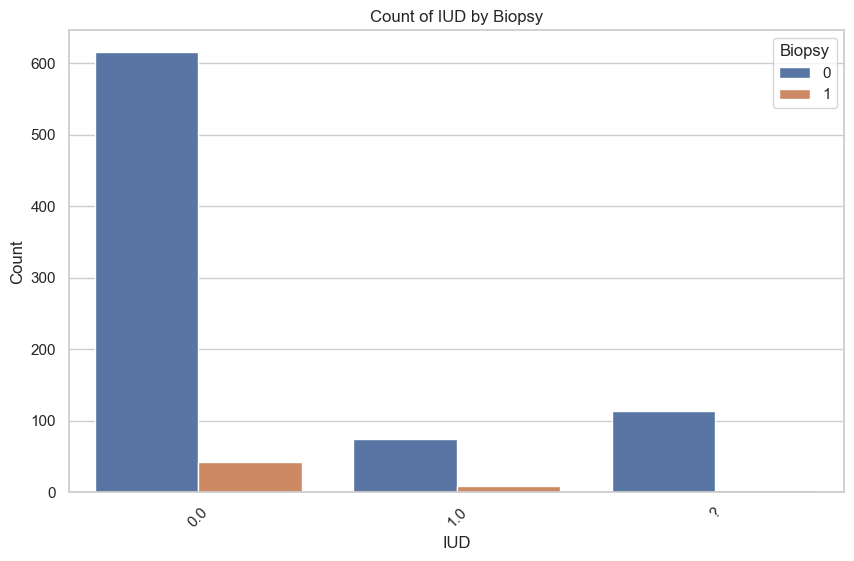

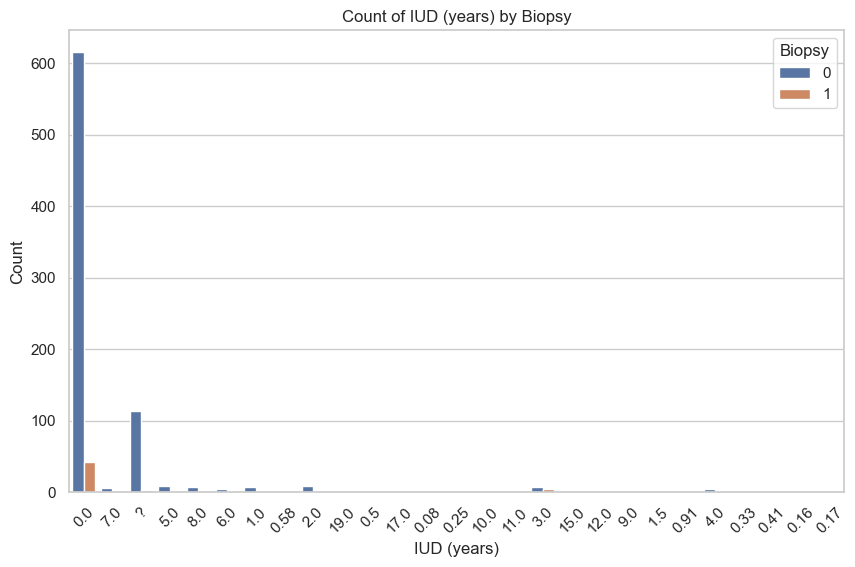

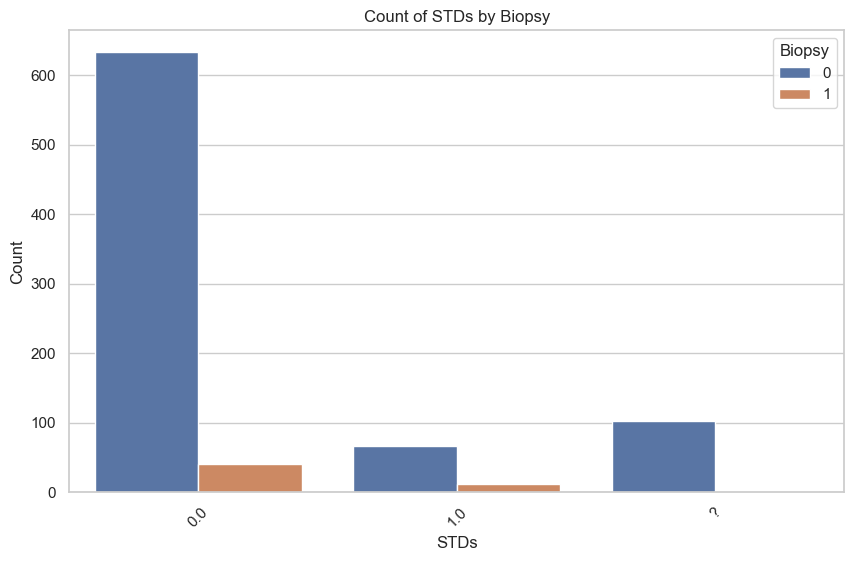

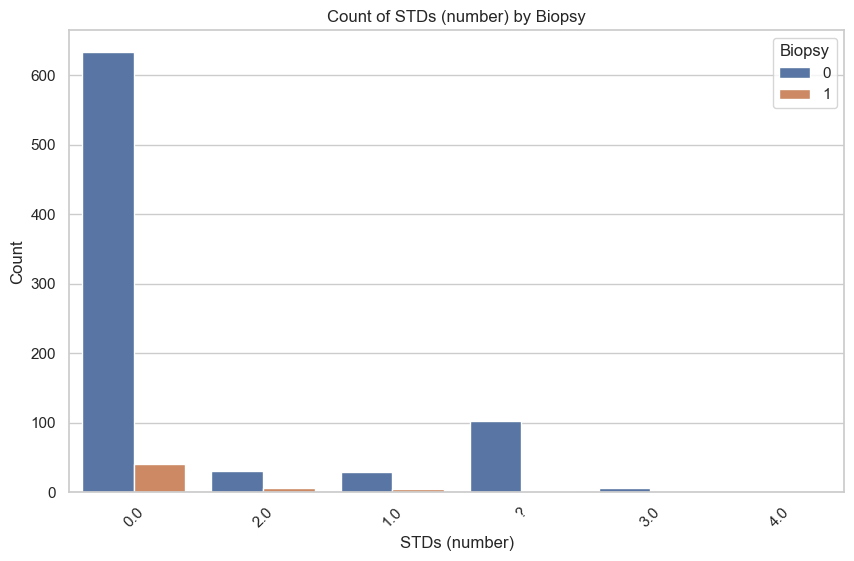

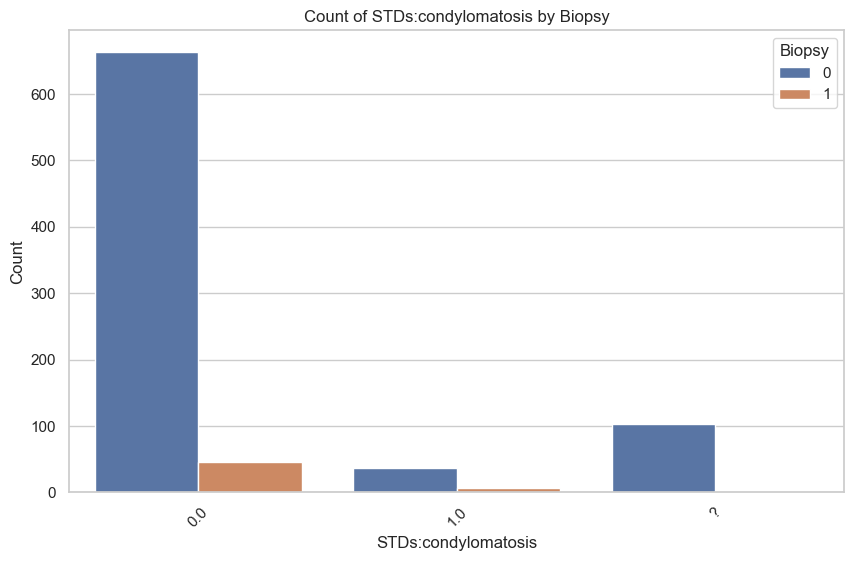

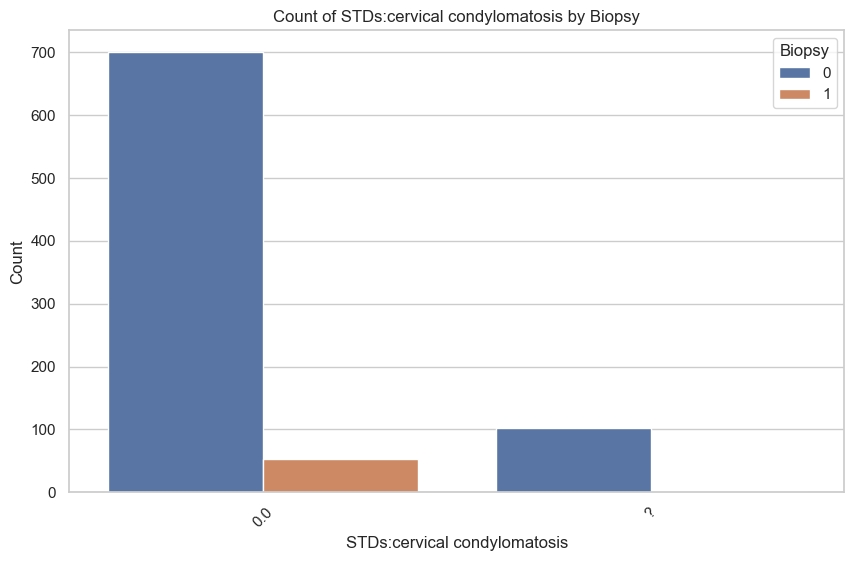

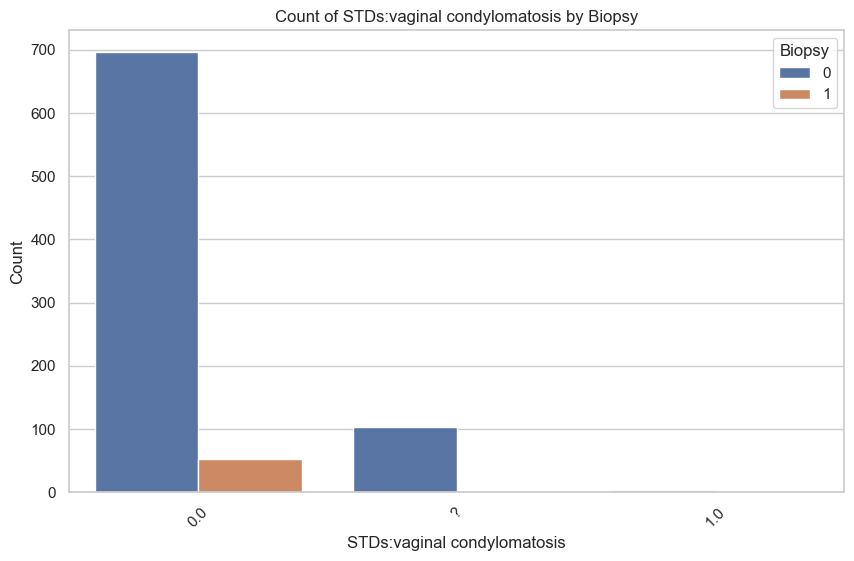

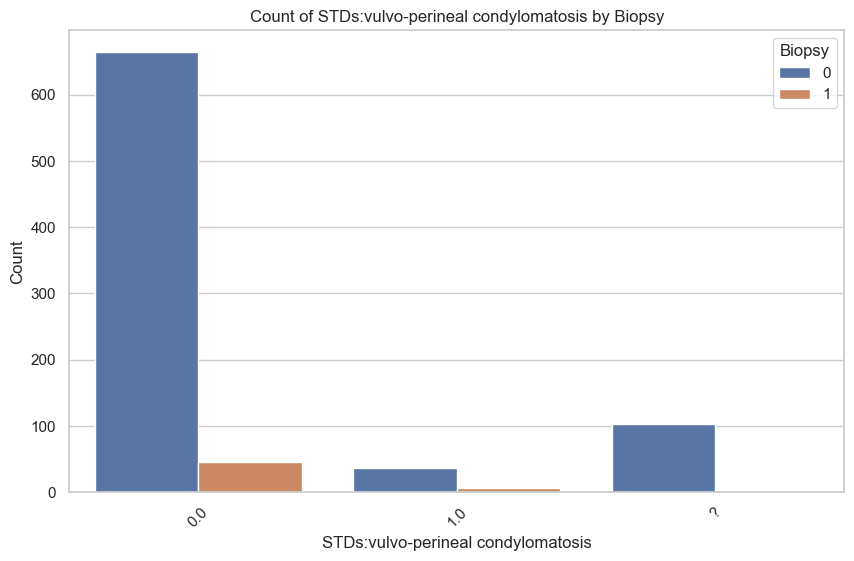

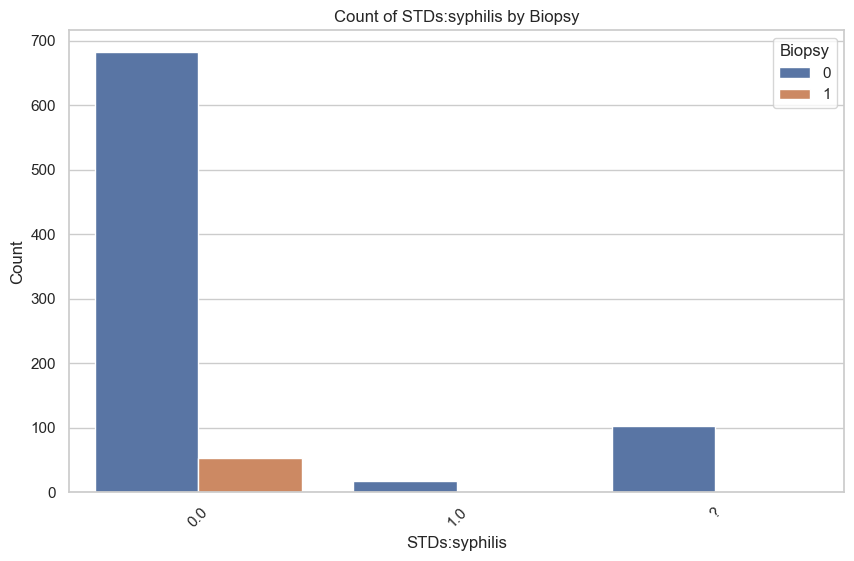

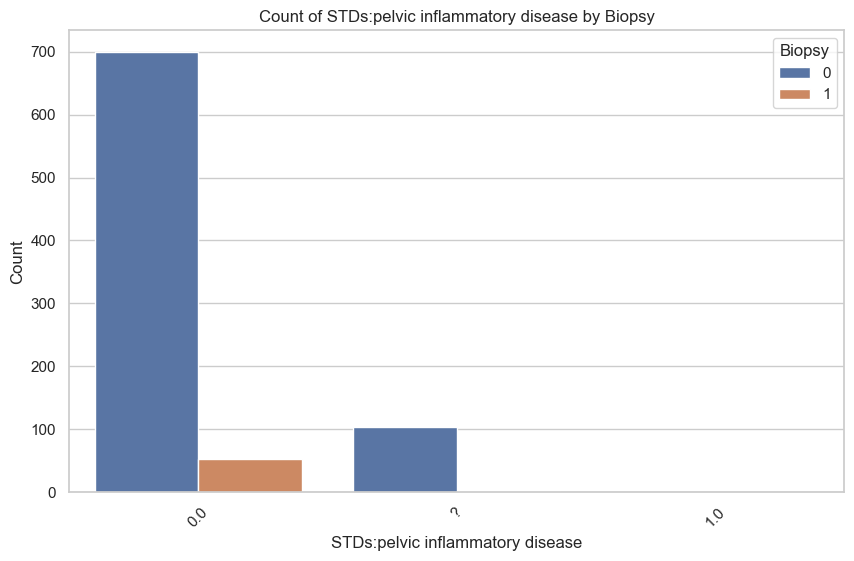

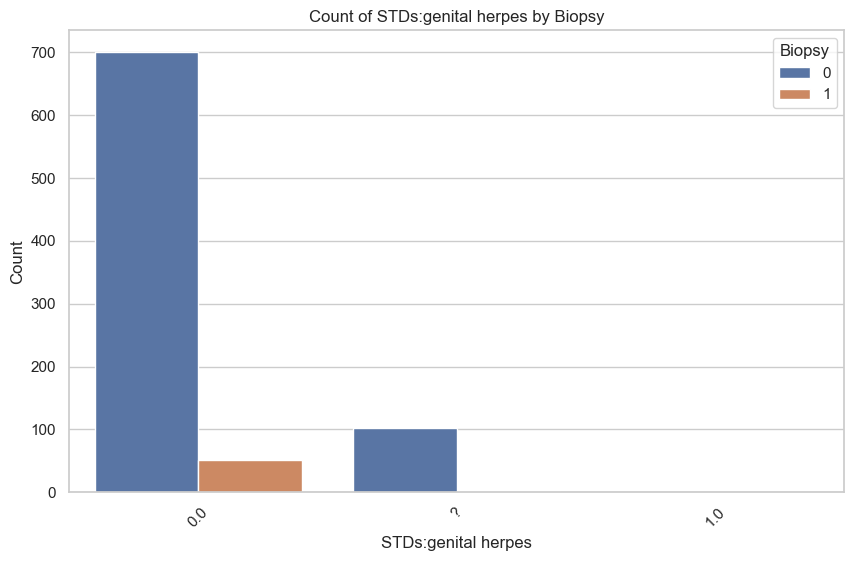

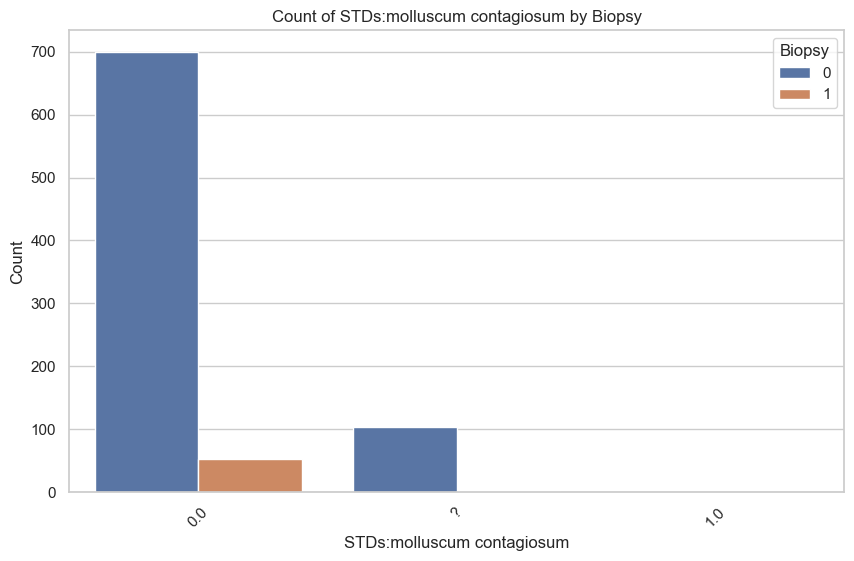

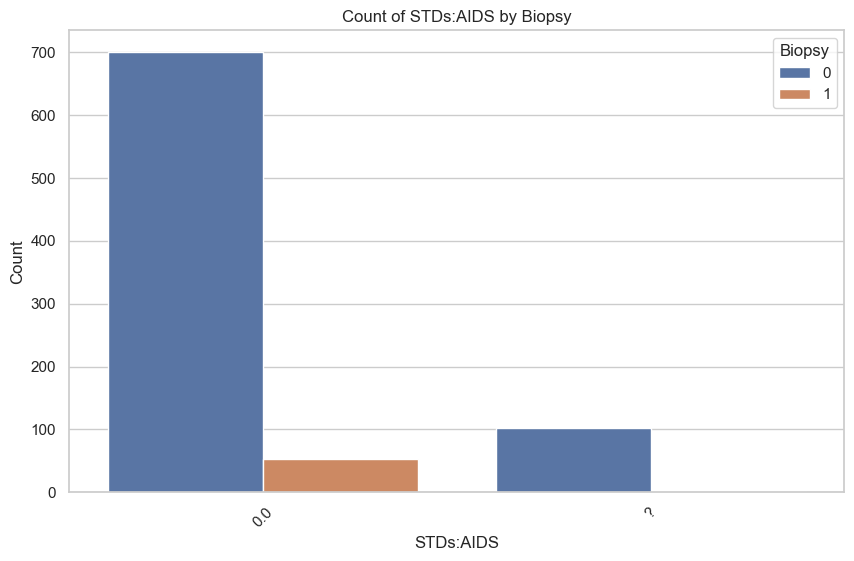

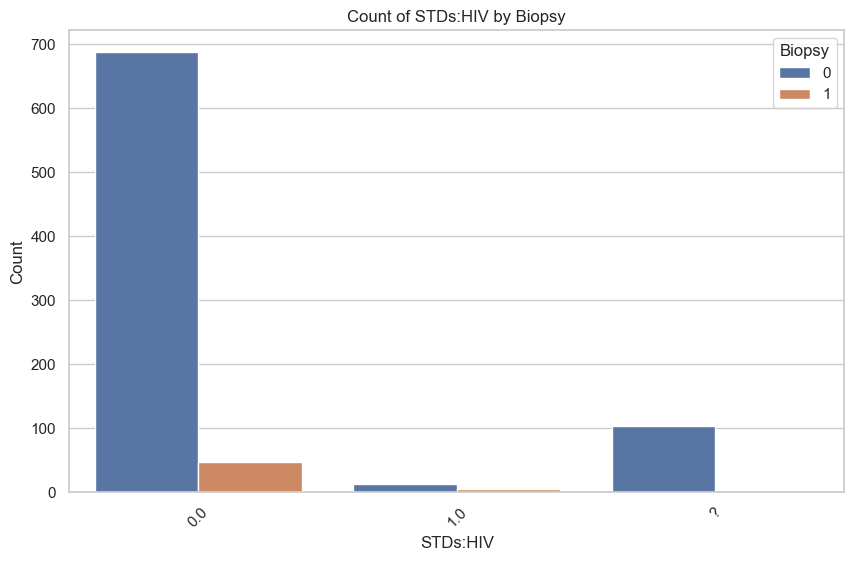

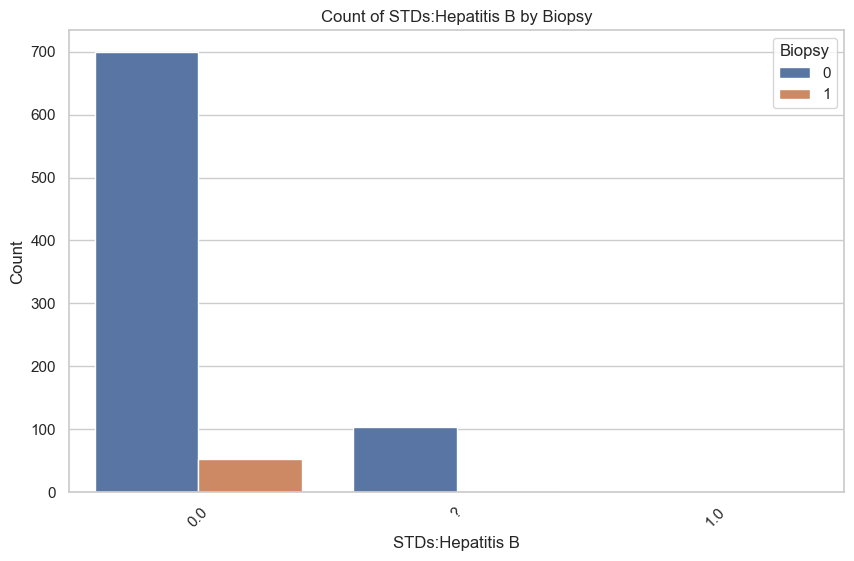

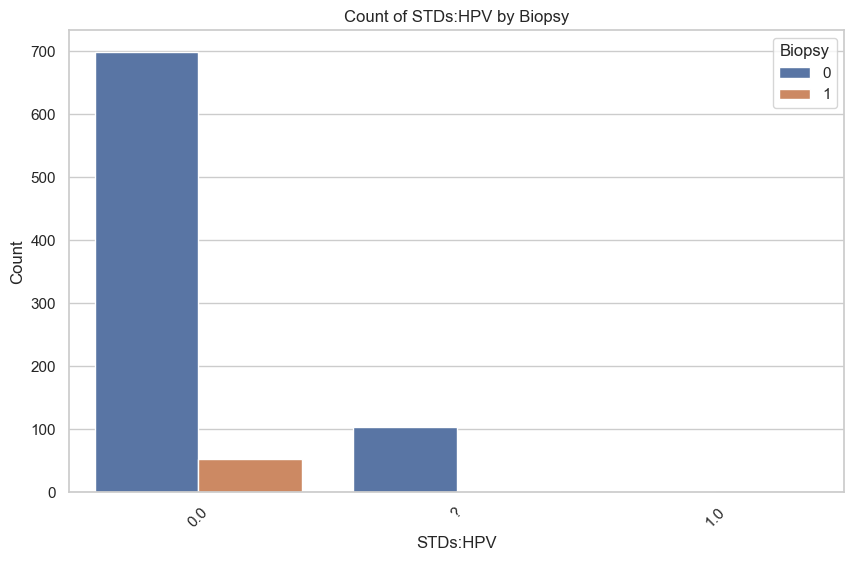

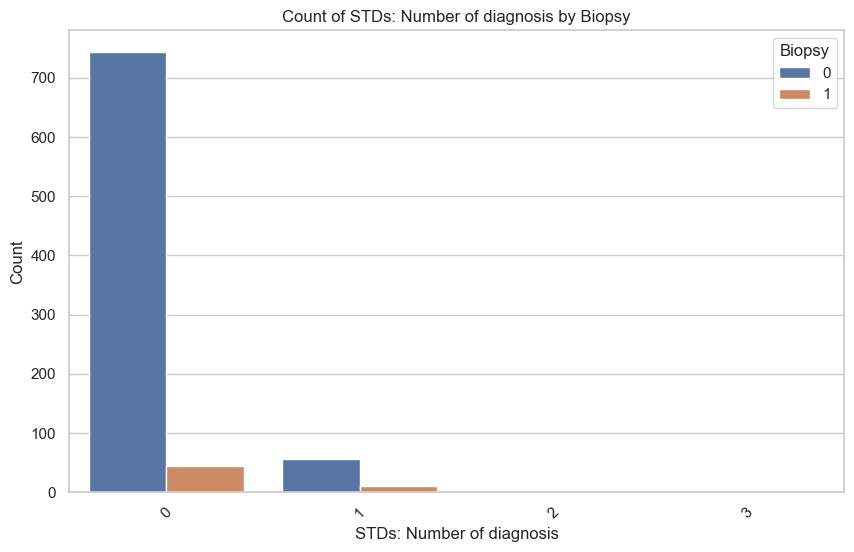

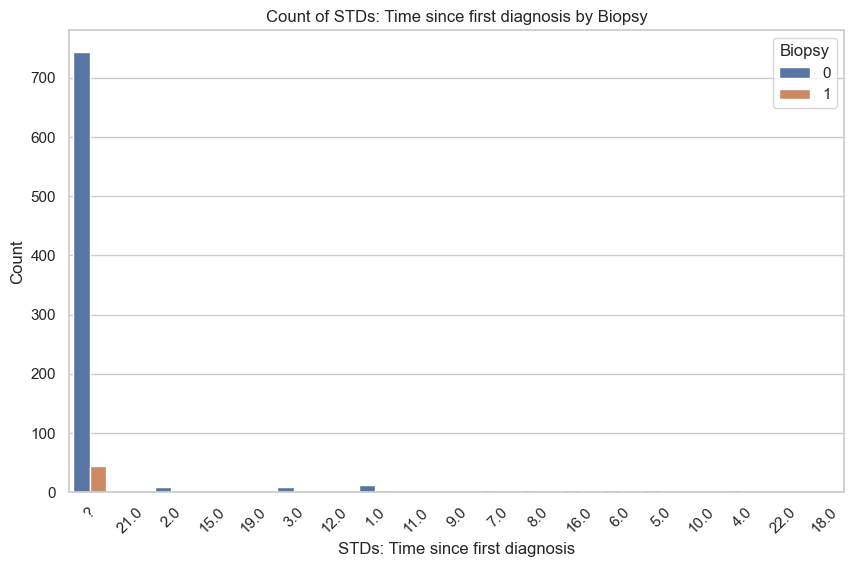

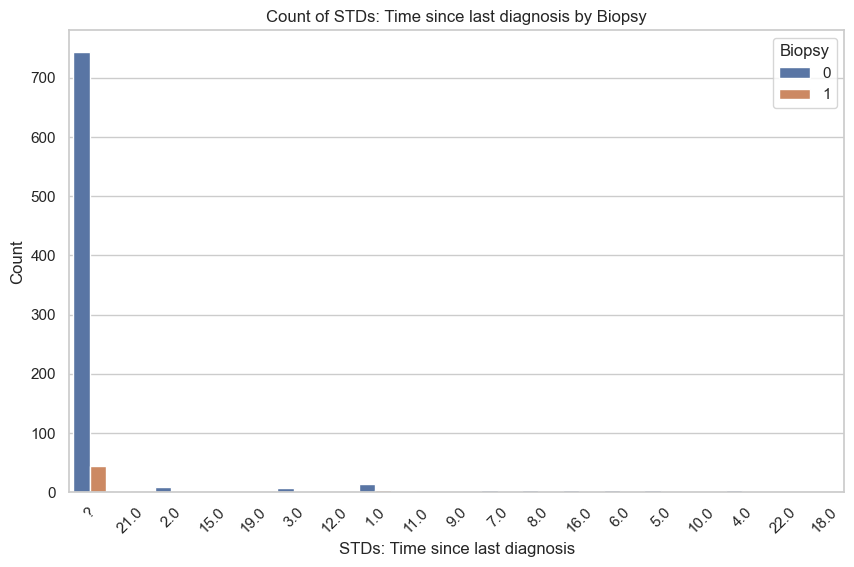

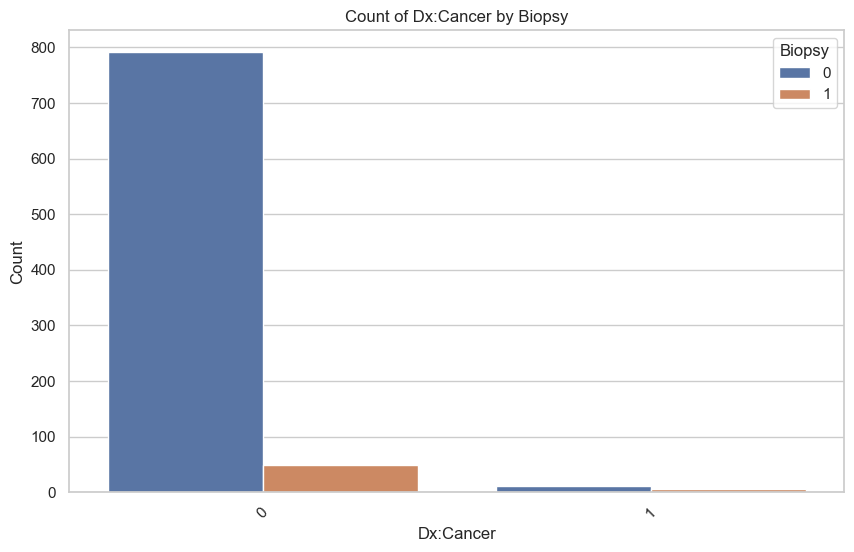

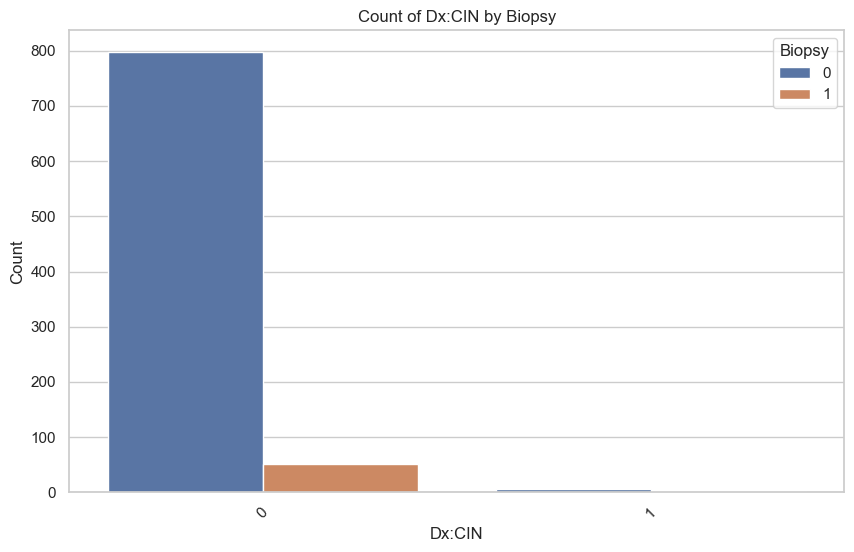

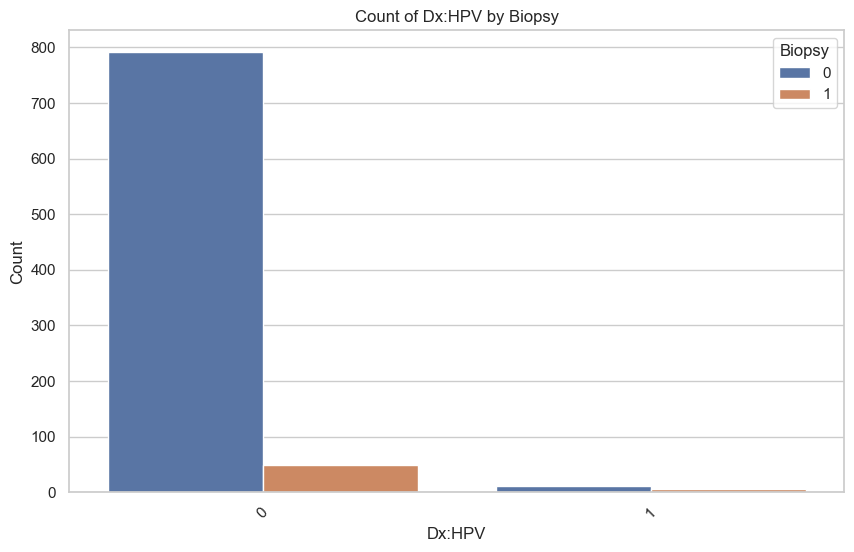

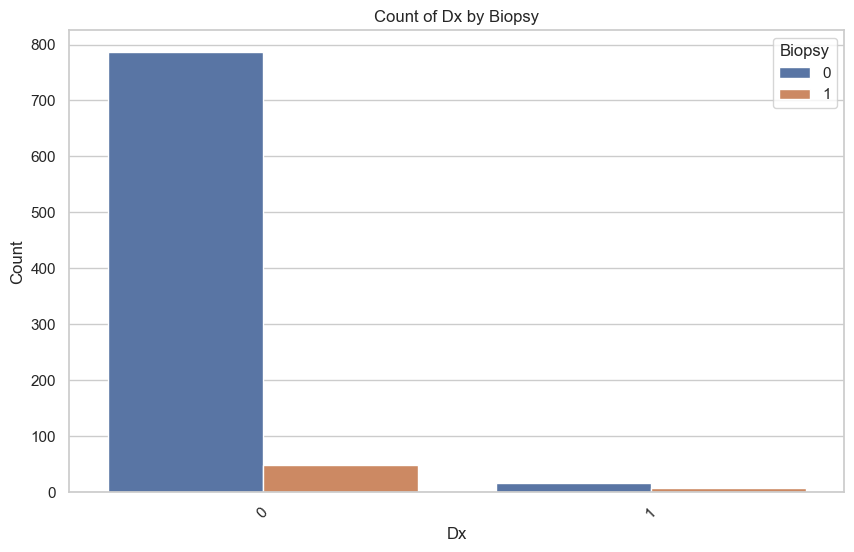

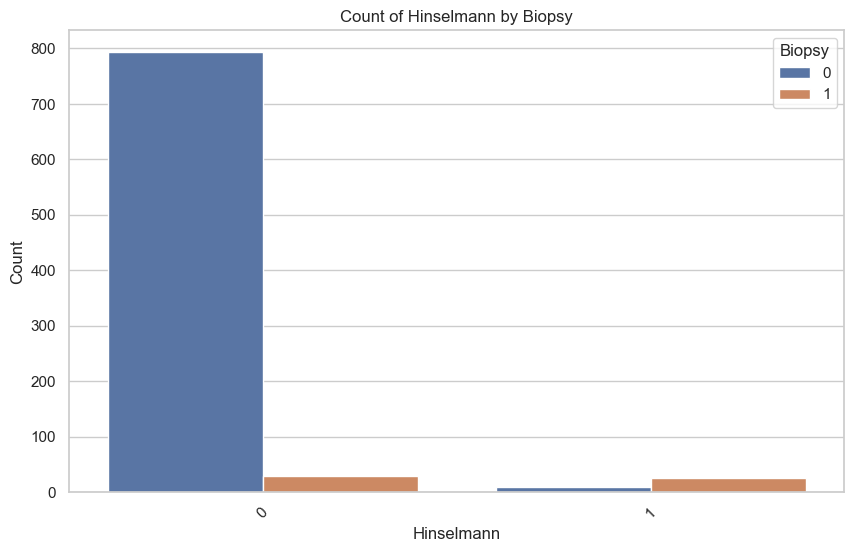

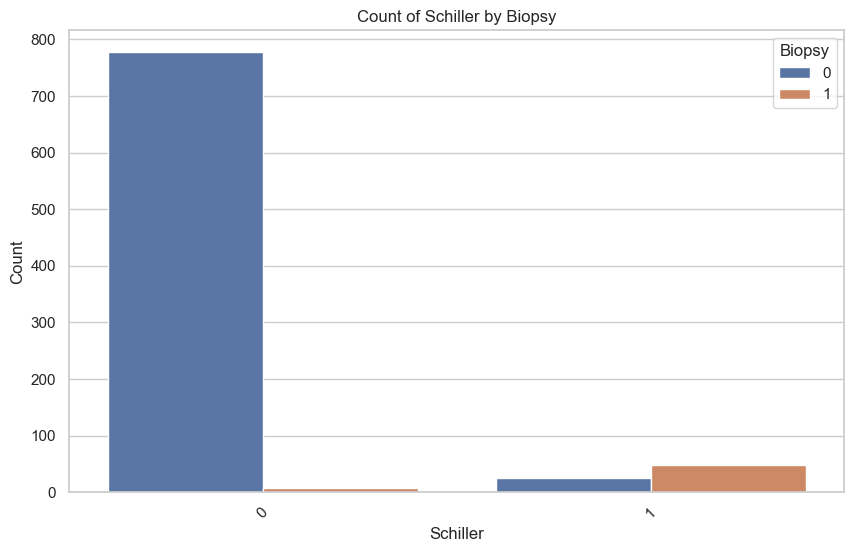

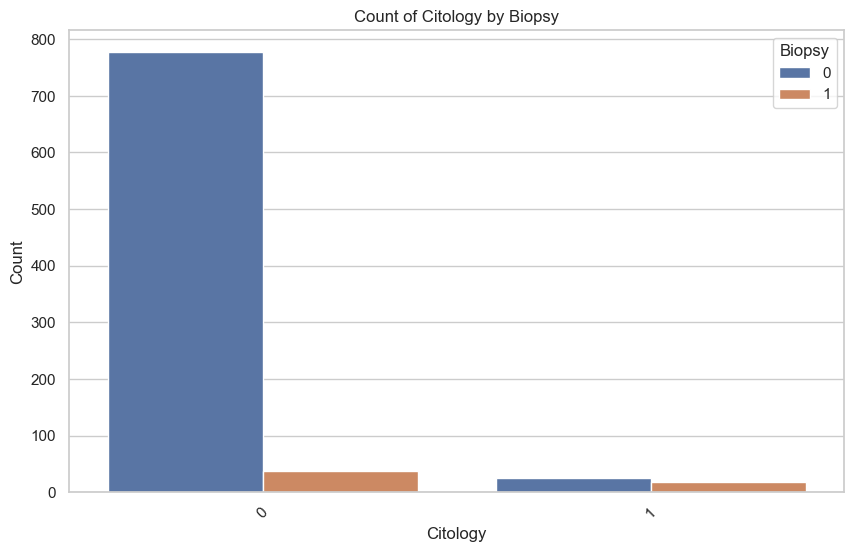

In [16]:
sns.set(style="whitegrid")

target_variable ="Biopsy"

for col in df.columns:
    if col != target_variable:
        plt.figure(figsize=(10,6))
        
        sns.countplot(data=df, x=col, hue=target_variable)
        plt.title(f"Count of {col} by {target_variable}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.legend(title=target_variable)

In [17]:
numerical_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 
                  'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 
                  'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis', 
                  'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']


In [58]:
nan_count = df.isna().sum()
print(nan_count)

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [62]:
#Define features (X) and target (y)
X = df.drop('Biopsy', axis=1)  # Features
y = df['Biopsy']                # Target

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Get feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})

C:\Users\ossum\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [14 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ossum\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [69]:
feature_scores

,Feature,Score
0,Age,2.688571
1,Number of sexual partners,0.000143
2,First sexual intercourse,0.045104
3,Num of pregnancies,1.386610
4,Smokes,0.706830
5,Smokes (years),3.218596
6,Smokes (packs/year),0.513571
7,Hormonal Contraceptives,0.277904
8,Hormonal Contraceptives (years),7.657874
9,IUD,3.013639


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Number of sexual partners'),
  Text(0, 2.5, 'First sexual intercourse'),
  Text(0, 3.5, 'Num of pregnancies'),
  Text(0, 4.5, 'Smokes'),
  Text(0, 5.5, 'Smokes (years)'),
  Text(0, 6.5, 'Smokes (packs/year)'),
  Text(0, 7.5, 'Hormonal Contraceptives'),
  Text(0, 8.5, 'Hormonal Contraceptives (years)'),
  Text(0, 9.5, 'IUD'),
  Text(0, 10.5, 'IUD (years)'),
  Text(0, 11.5, 'STDs'),
  Text(0, 12.5, 'STDs (number)'),
  Text(0, 13.5, 'STDs:condylomatosis'),
  Text(0, 14.5, 'STDs:cervical condylomatosis'),
  Text(0, 15.5, 'STDs:vaginal condylomatosis'),
  Text(0, 16.5, 'STDs:vulvo-perineal condylomatosis'),
  Text(0, 17.5, 'STDs:syphilis'),
  Text(0, 18.5, 'STDs:pelvic inflammatory disease'),
  Text(0, 19.5, 'STD

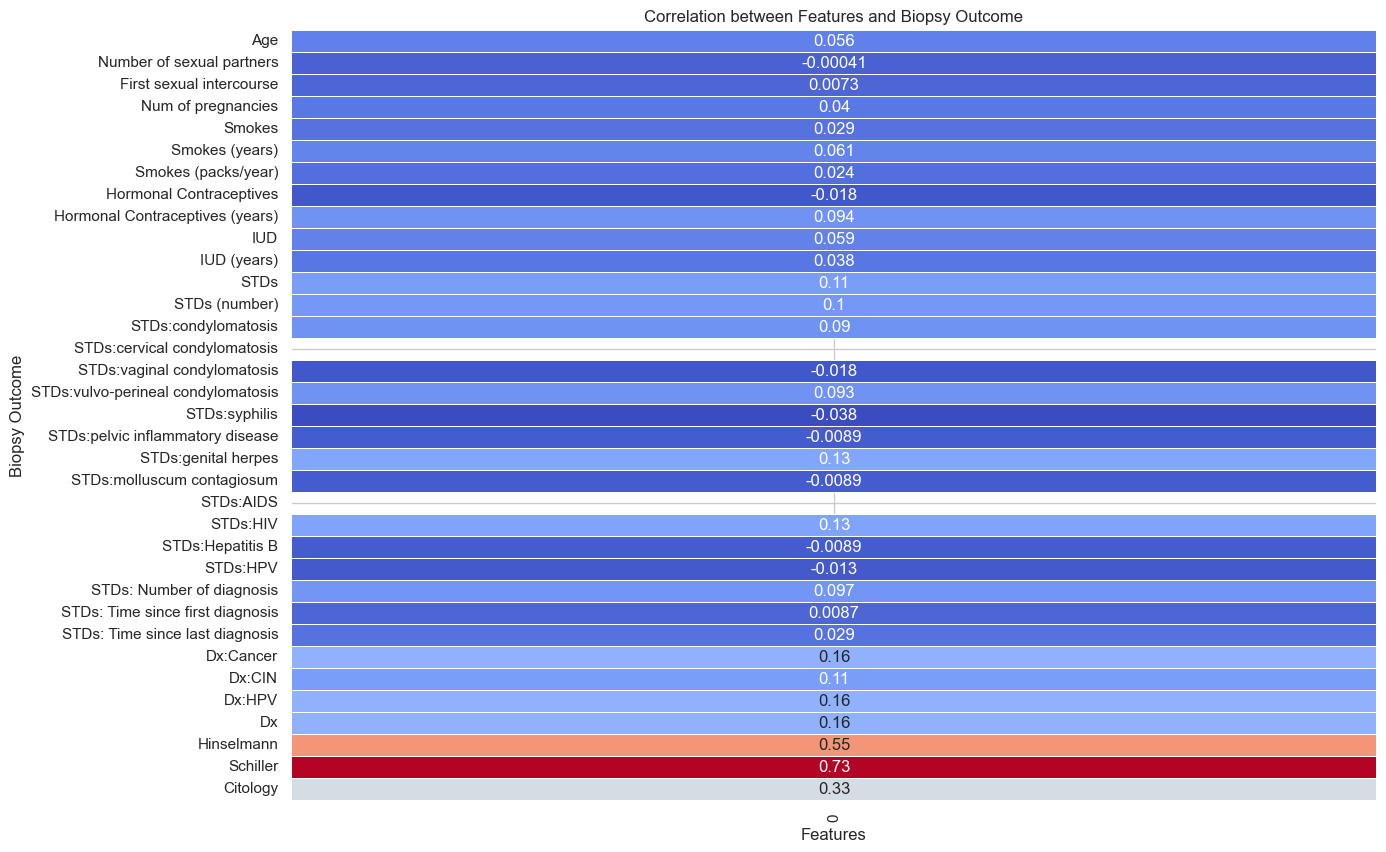

In [70]:
corr_matrix = X.corrwith(y)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm', cbar=False, linewidths=0.5)
plt.title('Correlation between Features and Biopsy Outcome')
plt.xlabel('Features')
plt.ylabel('Biopsy Outcome')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

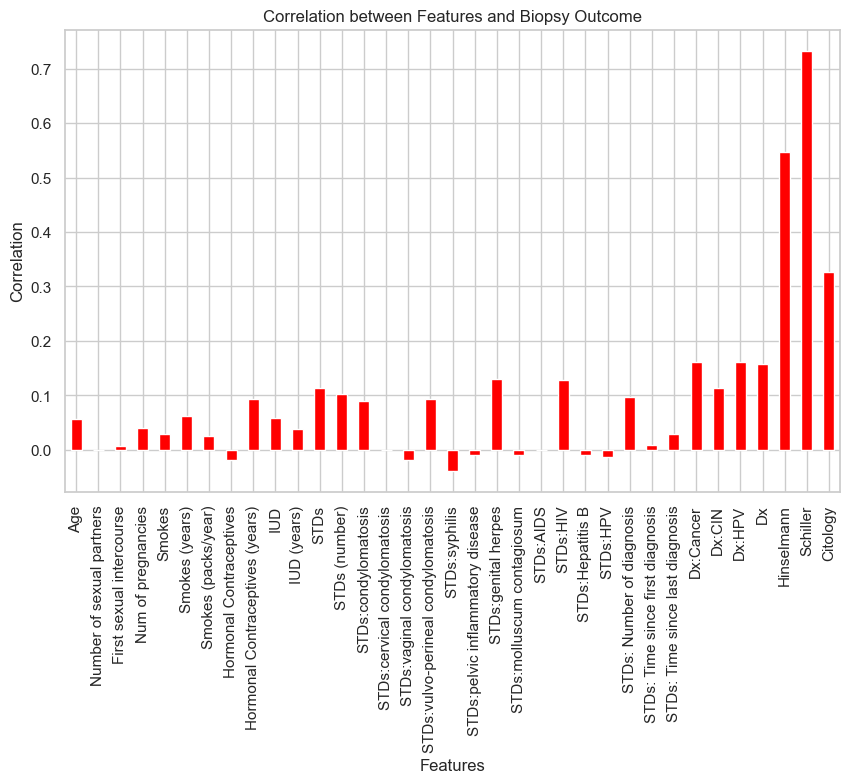

In [78]:
# Plot the correlation as a bar plot
plt.figure(figsize=(10, 6))
corr_matrix.plot(kind='bar', color='red')
plt.title('Correlation between Features and Biopsy Outcome')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()


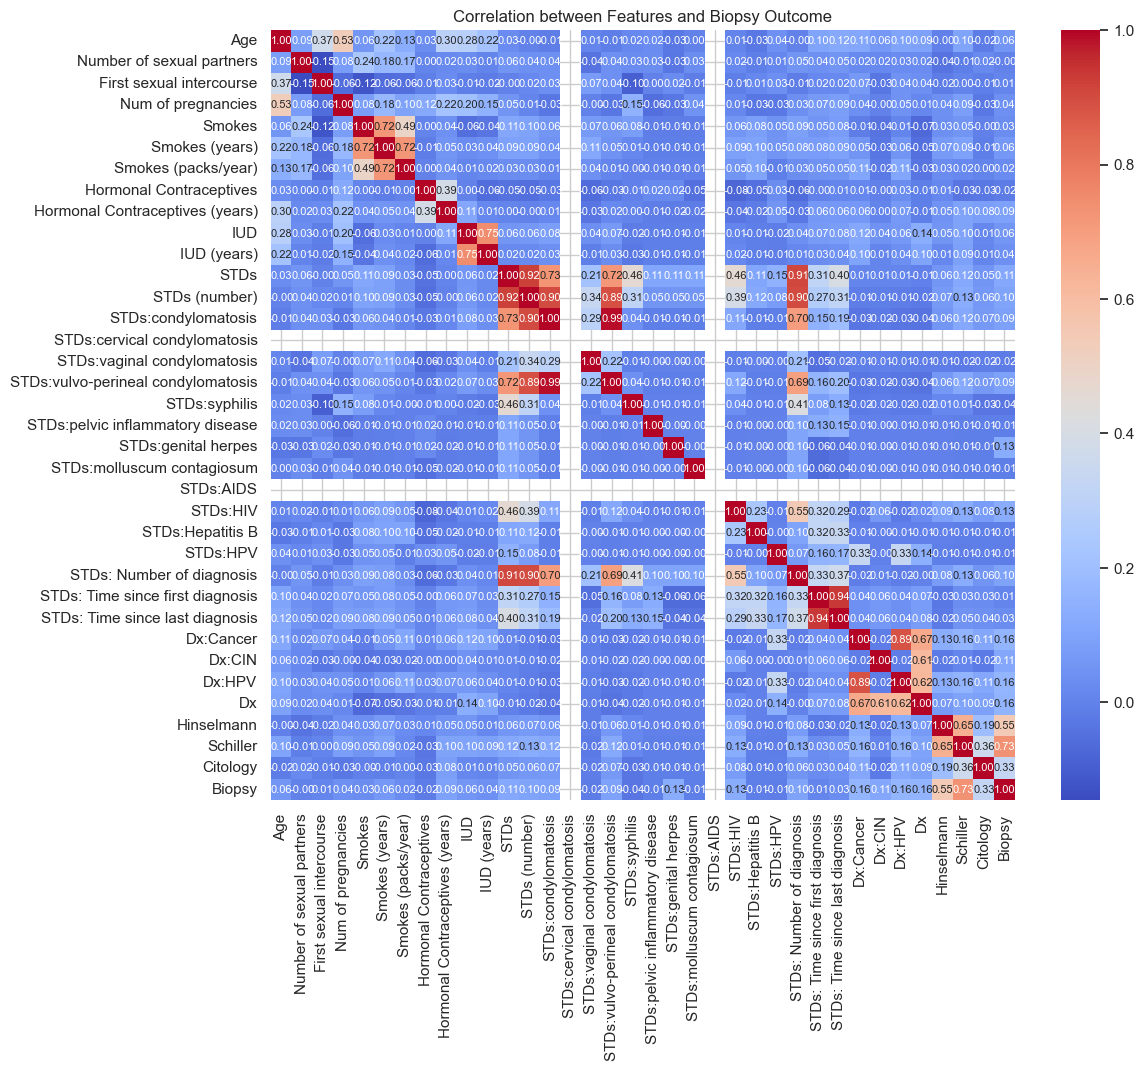

In [80]:
# Create a correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation between Features and Biopsy Outcome')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
